# Python Machine Learning

This Jupyter Notebook file contains a revisit to various beginner concepts and models to explore the particulars, refresh memory, and dive into the mathematics behind them.

## Table of Contents

- [Machine Learning](#machinelearning)
- [Supervised Learning](#supervised)
- [K-nearest Neighbours](#knn)
- [Naive Bayes](#naive)
- [Logistic Regression](#logres)
- [Support Vector Machines](#svm)
- [Neural Networks](#neural)
- [Linear Regression](#linear)
- [Unsupervised Learning](#unsupervised)
- [K-means Clustering](#k-means)
- [Principal Component Analysis](#pca)

## Machine Learning <a name="machinelearning" />

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import copy
import seaborn as sn

In [2]:
# Tensorflow
import tensorflow as tf

Machine learning is a subdomain of computer science that focuses on algorithms which help a computer learn from data without explicit programming. Explicit programming is the practice of telling a piece of code exactly what to do. Most programs are products of explicit programming. There are several fields which tend to get confused in machine learning, namely: Artificial Intelligence (AI), Machine Learning (ML), and Data Science (DS), and more...

- **AI**: Artificial intelligence is an area of computer science, where the goal is to enable computers and machines to perform human-like tasks and simulate human behavior
- **ML**: Machine learning is subset of A1 that tries to solve a specific problem and make predictions using data
- **DS**: Data science is a field that attempts to find patterns and draw insights from data (might use ML!)

All of these fields overlap and all may utilize Machine Learning for their goals.

There are various types of machine learning as well, namely:

- **Supervised Learning**: Supervised learning uses labeled inputs (meaning the input has a corresponding output label) to train models and learn outputs
- **Unsupervised Learning**: Unsupervised learning uses unlabeled data to learn about patterns in data
- **Reinforcement learning**: An agent learning in an interactive environment based on rewards and penalties

<img src="images/supervised.png" width="750" />

The above image shows an example of supervised learning. Data is labelled (in this case as cats or dogs), so the model is aware of what is what. With unsupervised learning, these labels would not exist and it's up to the model to determine patterns in a large collection of data to figure out which images are of cats, and which images are of dogs. Reinforcement learning is a very different section, where rewards and penalties come into play. This would be akin to learning a dog how to do tricks, and providing rewards when desired behaviour is displayed.

## Supervised Learning <a name="supervised" />

<img src="images/modelexample.png" width="750" />

The above image shows what a typical model in Machine Learning looks like. Some input is given to the model, the model performs its task, and then outputs or predictions are given. In this sense, it's barely different from a regular computer program. The inputs are referred to as **features**, and the collection of features is called the **feature vector**.

There are different types of features possible, namely:

- **Qualitative**: Qualitative data is categorical, meaning that there is a finite number of categories or groups. For example: male or female, or countries, or test scores. There are several flavours of data within this category as well:
    - **Binary**: Data that can be represented by a binary choice: male or female, right or wrong, 0 or 1, etc.
    - **Nominal**: Data that doesn't contain an inherent order: countries, colours, shapes, etc.
    - **Ordinal**: Data that does contain an inherent order: age, test scores, satisfaction ratings, etc.

- **Quantitative**: Quantitative data consists of numerical values. This type of data also has several different flavours:
    - **Continuous**: Data that has an inherent, continuous order to it: temperature, length, time, etc.
    - **Discrete**: Data that consists of fixed values, usually determined by counting: # of eggs, # of jumps, # of medals won, etc.

In supervised learning, there are several tasks that can be performed. These are:

- **Classification**: Predicting discrete classes, such as classifying types of food. There's two different types of classification available as well:
    - **Binary Classification**: Predicting whether an image is of a certain class or not: positive/negative, cat/dog, spam/not spam, etc.
    - **Multiclass Classification**: Predicting of which class an image is: cat/dog/lizard, orange/apple/pear, plant species, etc.

- **Regression**: Predicting continuous values, such as predicting temperature or product prices.

Before training a model, it's common to split data up in training and testing sets, and optionally a validation set. The training set is the data that the model will be trained on, and the testing set will be used for predictions to test the model's performance. The testing data is unseen by the model during training, which guarantees that the model relies on its learned experience to make predictions. The validation set can serve as an optional sanity check during/after training of the model to check performance.

<img src="images/modeltraining.png" width="750" />

The above image shows a typical training process (with chocolate). The training set is fed to the model, which performs its duties. Training results are compared against the actual training data, which results in what's known as **loss**. This term refers to the difference between an actual value and the predicted value. Based on these loss values, certain adjustments are made during the next iteration in the training process to improve performance.

The validation set is used in a similar way, but loss values are never fed back to the model for adjustments and training improvements. The usage of a validation only serves to observe loss values to determine progression.

The loss is a **metric** of performance, also known as a loss function. Loss is essentially the difference between your prediction and an actual value. How calculations are done depends on which loss function is used. Some examples are **L1Loss** and **L2Loss**:

<img src="images/lossfunctions.png" width="750" />

The **L1Loss** loss function takes the absolute value of the difference between the real value and the predicted value. The **L2Loss** function takes a squared value of the difference between the real and predicted value. This means that if the prediction is very close, the penalty is very minimal. But if the prediction is not as close, then the penalty will be much higher.

There are many more loss functions available, some much more complicated than others. This goes to show the variety of approach that can be taken, depending on the context of a machine learning problem.

In [3]:
# Loading and preparing data
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("data/magic04.data", names=cols)
df["class"] = (df["class"] == "g").astype(int)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

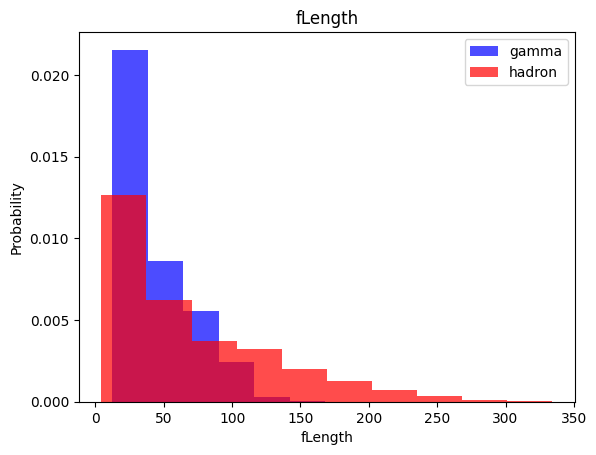

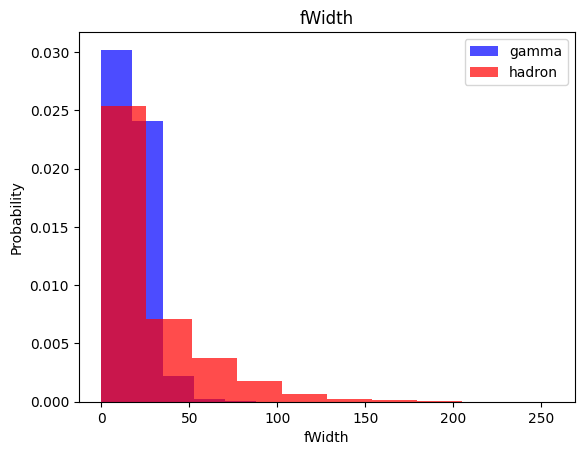

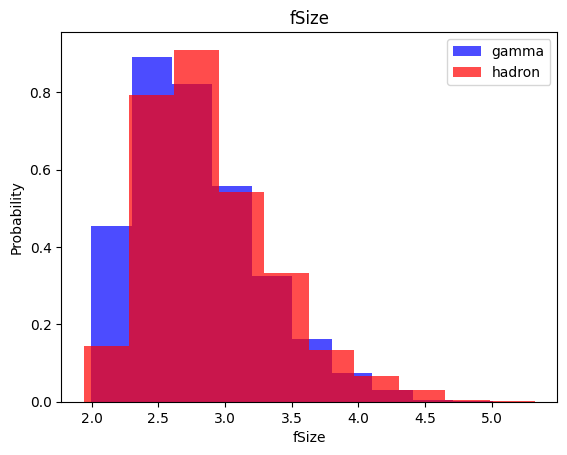

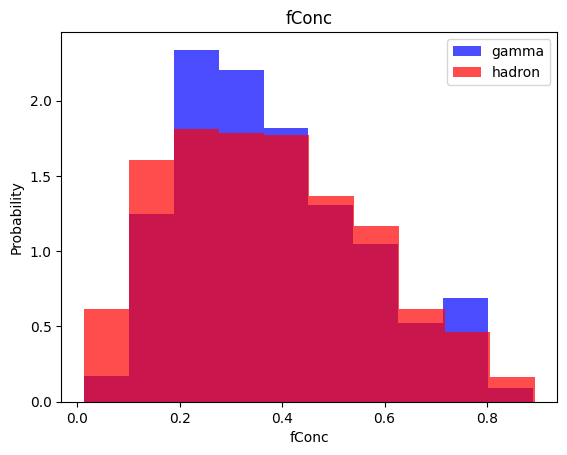

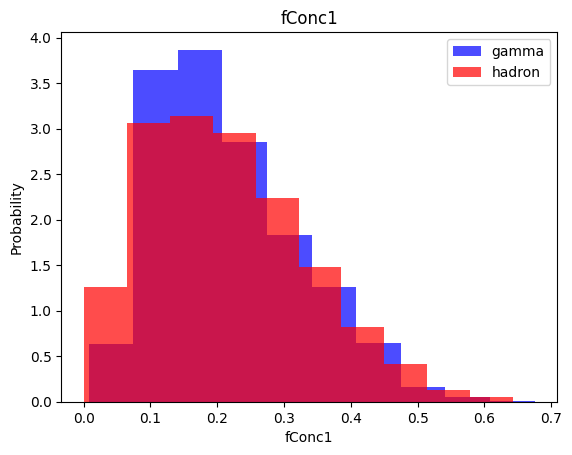

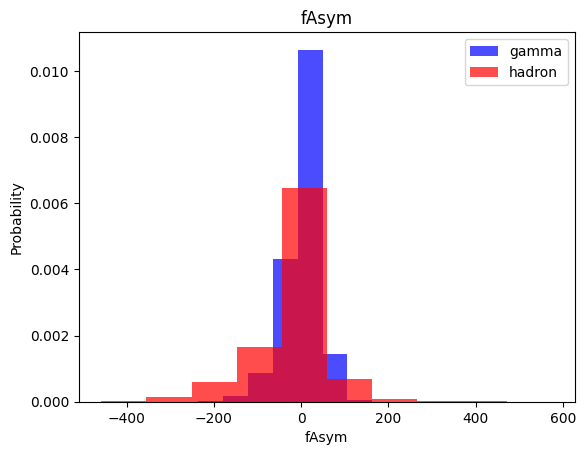

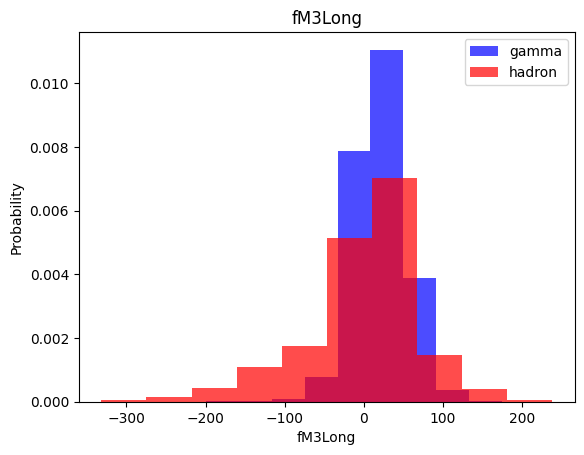

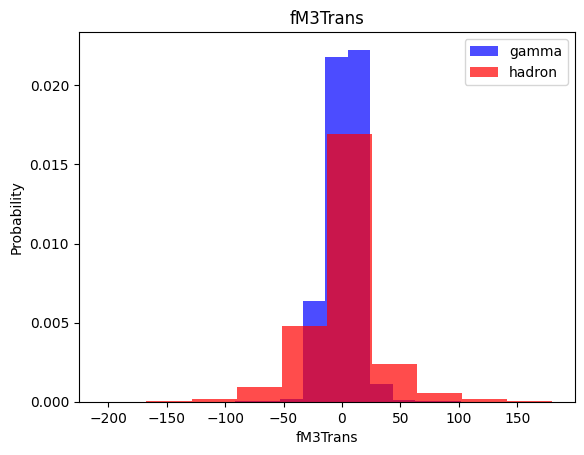

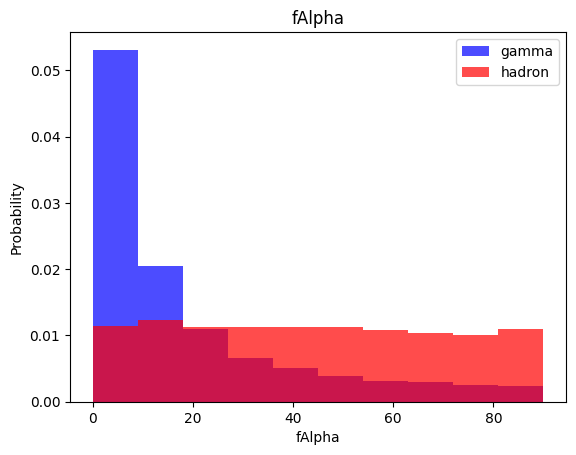

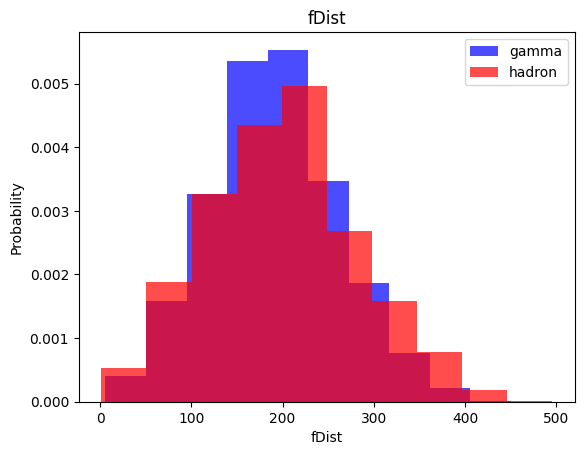

In [4]:
# Creature a histogram for every feature, based on class
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color="blue", label="gamma", alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], color="red", label="hadron", alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [5]:
# Creating train, validation, and test splits of the data using numpy
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [6]:
# Create function to scale the dataset
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)  
    data = np.hstack((X, np.reshape(y, (-1, 1))))
    
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
    
    return data, X, y

It may be necessary to scale the dataset. Variables that are measured at different scales do not contribute equally to the training of the model, and may create a bias. There are many ways to standardise, but the chosen `StandardScaler` from `sklearn.preprocessing` standardizes the data to have a mean of 0 and standard deviation of 1.

Oversampling or undersampling may also be necessary. These are useful techniques when there is a huge difference in class distribution. The two main approaches to randomly resampling an imbalanced dataset are to delete examples from the majority class, called undersampling, and to duplicate examples from the minority class, called oversampling. For this implementation, the `RandomOverSampler` from `imblearn.over_sampling` is used.

In [7]:
print(len(train[train["class"]==1])) # gamma
print(len(train[train["class"]==0])) # hadron

7384
4028


In [8]:
train, X_train, y_train = scale_dataset(train, True)
valid, X_valid, y_valid = scale_dataset(valid, False)
test, X_test, y_test = scale_dataset(test, False)

In [9]:
len(y_train), sum(y_train==1), sum(y_train==0)

(14768, 7384, 7384)

## K-nearest Neighbours <a name="knn" />

<img src="images/knn.png" width="750" />

The above plot illustrates an example dataset to work with. The X-axis ($X_0$) contains income in \\$1000 per year, and the Y-axis ($X_1$) contains the number of kids someone has. Within the plot, the plus signs represent a data point of someone that owns a car, and a minus sign represents someone without a car. This means that the samples are labelled in a way (car or no car).

Assume that a new sample is added to the dataset, which is plotted on the coordinates (40,2). Is it likely that this sample contains a car, or not? Just by observing, it's likely that this sample belongs to the no-car group. It follows an established pattern that is visible within the plot. This is the entire concept of K-nearest neighbours: looking at the surrounding values and choosing the majority-observed label. However, a machine learning algorithm such as K-nearest Neighbours uses mathematics instead.

To implement the K-nearest Neighbours, it's necessary to define a distance function, often referred to as **euclidian distance** in 2D plots.

<img src="images/euclidian.png" />

The above image illustrates this euclidian distance, which essentially boils down to the length of the lines separating two data points in the plot. The mathematical equation for this distance function is:

$\Large d=\sqrt{(x_1-x_2)^2+(y_1-y_2)^2}$

The **K** in K-nearest Neighbours refers to how many neighbours are used to judge which label a new data point should gain. In the example above, a K of 7 is used (5 minus sign samples, and 2 plus sign samples). How many neighbours to use depends on the size of the dataset.

In [10]:
# Creating a KNN model with sklearn and fitting data to the model
# The K is set to 1 at first to use as an example
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model = knn_model.fit(X_train, y_train)

In [11]:
# Checking K after model creation
knn_model.n_neighbors

1

In [12]:
# Making predictions of the test data
y_pred = knn_model.predict(X_test)

In [13]:
# Comparing the test data predictions and test data labels
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74      1324
           1       0.85      0.89      0.87      2480

    accuracy                           0.83      3804
   macro avg       0.81      0.80      0.80      3804
weighted avg       0.82      0.83      0.82      3804



Here, the results show an accuracy of ~82%, as visible in the f1-score column. This is not a bad result for a first pass with a K of 1.

<img src="images/precisionrecall.png" width="750" />

As visible in the above image, precision refers to the number of true positives divided by the number of true positives and false positives. Thus, precision checks how many of the positive results are actually supposed to be positive. Recall checks out of how many values that are supposed to be positive have been predicted as positive.

This means that, according to the classification report, 77% of all positively predicted outcomes for the 0-labelled data are actually positive, and that 69% of all predictions that should be positive, were actually positive. The same applies for the 1-labelled data with a precision of 84% and a recall of 89%. The F1-score is more of a combination between precision and recall, which makes it the more valuable score to look at in this scenario.

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model = knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73      1324
           1       0.86      0.85      0.85      2480

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [15]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model = knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1324
           1       0.86      0.86      0.86      2480

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



These examples show that an increase in K changes the results slightly. Overall, the model remains relatively simple, which means that it attains decent results, but nothing too special so far.

## Naive Bayes <a name="naive" />

Another model to use is called Naive Bayes. For this example, the following data is used:

<img src="images/naivebayesdata.png" width="750" />

In order to understand the concepts of Naive Bayes, it's important to dive into some conditional probability and the Bayes rule. One question to ask could be: "What is the probability of having Covid, given a positive test result." This could then be written as:

$\Large P(covid|+test)$

In other words, this condition is asking to look at the column of data about positive tests, and see how many people there have covid, or not. Thus, out of 551 people with a positive test, 531 people have covid, and 20 do not. The calculation is then as such:

$\Large P(covid|+test)=531/551=0.96370...$

There is a ~96.4% chance for someone with a positive test in this dataset to actually have covid.

<img src="images/bayesrule.png" width="750" />

It's now important to talk about the Bayes Rule, which asks about the probability $(P)$ of something $(A)$ happening, considering that something else $(B)$ has happened. This is the same probability structure as the previous example about covid data. But what if there is no data available for the probability $P(A|B)$? The rule states that it's possible to calculate this probability as long as the probabilities are known for $P(B|A)$, $P(A)$ and $P(B)$, using the above equation.

Assume the following:

$\Large P(false positive)=0.05$

$\Large P(false negative)=0.01$

$\Large P(covid)=0.1$

$\Large P(covid|+test)=?$

There are various probabilities here that can be used to figure out the probability of $P(B|A)$. The first probabiliy can be rewritten as $P(+|nocovid)$, as it's a positive test result while the person doesn't have covid. The second probability can be rewritten as $P(-|covid)$ as it's a negative test result while the person does have covid.

These 2 probabilities can be used to create a maxtrix of positive and negative test results, and people who do and don't have covid.

In [16]:
pd.DataFrame({"+":[0.99, 0.05], "-":[0.01,0.95]}, index=["Covid", "No Covid"])

+     -
Covid     0.99  0.01
No Covid  0.05  0.95

The probabilities can be used to fill in 2 of the 4 fields. The other 2 values (0.99 and 0.95) are found through a logical trick. In this data, there are people with covid. Many of them will test positive, and some will test negative. Whatever the probabilities are, both probabilities summed up will cover all people with covid. Thus, the probabilities must sum up to 1 (100%). As people with covid that tested negative (false negatives) have a probability of 0.01, the other value (reciprocal) must be 0.99. The same trick is applied for people without covid.

With these values in place, the Bayes Rule can now be applied to find the probability of $P(covid|+test)$.

$\Large P(A|B)={P(B|A)\times P(A)\over P(B)}$

$\Large P(covid|+test)={0.99\times 0.1\over 0.99\times 0.1 + 0.05\times 0.9}$

$\Large P(covid|+test)=0.6875$

In the equation, the probability of a positive test $P(B)$ requires a bit more explanation. There are 2 ways to get a positive test result. The first requires someone to have covid, and then test positive. The chance to have covid was already defined as 0.1, according to the matrix, the chance to get a positive test result with covid is 0.99. This grants the first part of $P(B)$. The other way to get a positive test result is to not have covid and cause a false positive. As the chance to have covid is 0.1, the chance to not have covid is 0.9. Then, the chance to get a positive result is 0.05.

This Bayes Rule can also be expanded to be applied to classification. When done so, the following equation is used:

<img src="images/naivebayes.png" />

Some important terminology here:
- $C_k$: The classes of data,  e.g., $C_0$ = dog, $C_1$ = cat, $C_2$ = lizard...
- $x$: The feature vector
- $P(C_k|x)$ is the posterior: the probability of classes $(C_k)$ given predictor $(x)$.
- $P(x|C_k)$ is the likelihood: the probability of predictor $(x)$ given classes $(C_k)$. 
- $P(C_k)$ is the prior: the probability of classes
- $P(x)$ is the evidence: the probability of a predictor

With the feature vector $(x)$ expanded, the equation takes on the following appearance:

$\Large P(C_k|x_0,x_1,...,x_n)={P(x_0,x_1,...,x_n|C_k)\times P(C_k)\over P(x_0,x_1,...,x_n)}$

Here, it's important to note that the evidence has no impact on the class at all. The evidence remains the same at all times, and is considered to be a constant. The equation can then be rewritten as such, using proportionality:

$\Large P(C_k|x_0,x_1,...,x_n)\propto P(x_0,x_1,...,x_n|C_k)\times P(C_k)$

In addition, the point of Naive Bayes being naive, is the assumption that all features in the feature vector are independent of each other. This means that $P(x_0,x_1,...,x_n|C_k)$ of the latter part of the equation can be rewritten as:

$\Large P(x_0|C_k)\times P(x_1|C_k)\times ... \times P(x_n|C_k)$

This part of the equation can be rewritten to become more concise, when combined with the other parts so far, the following equation is the result:

$\Large P(C_k|x_0,x_1,...,x_n)\propto P(C_k)\prod\limits_{i=1}^{n}P(x_i|C_k)$

This equation means that the probability of being in a certain class or category, given all the different features of the feature vector $P(C_k|x_0,x_1,...,x_n)$, is proportional to the probability of that class in general $P(C_k)$ multiplied by the probability of each of the features, given that a certain class or category is being tested $\prod\limits_{i=1}^{n}P(x_i|C_k)$.

Now how is this equation used to make a classification? For that, the following equation is used:

$\Large\hat{y}=argmax P(C_k)\prod\limits_{i=1}^{n}P(x_i|C_k)$

Here, $\hat{y}$ represents the predicted value. The predicted value will be the result of the latter expression with the highest resulting value. As the equation is performing a mathematical calculation for every single class $C_k$ available, the highest value among the results represents the class that achieved the best result. This principle of going through the motions with every class to find the class with the maximum result is also referred to as **MAP**: Maximum a Posteriori.

In [17]:
# Creating a Naive Bayes model
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [18]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50      1324
           1       0.74      0.89      0.81      2480

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



With this Naive Bayes implementation, an accuracy of 72% was attained. While not too shabby, the results are worse than the K-nearest Neighbours results.

## Logistic Regression <a name="logres" />

<img src="images/regression.png" width="750" />

The above image is an example of a regression line when attempted to create a regression based on the shown two groups of samples (the plusses and minuses). It's visually clear that a regression like that does not suit a classification problem. Thus, regression cannot be applied to a classification problem.

The equation for the example would be:

$\Large \hat{y}=mx+b$

Here, $\hat{y}$ is the predicted value, $m$ is the slope, $x$ corresponds to the X-axis, and $b$ is the intercept.

However, when a linear regression is used, the resulting values can range from negative infinite to infinity. But with a classification problem (such as this logistic regression), probabilities are predicted instead. Probabilities always have to range from 0 to 1, as they correspond to percentages. So how can probability be modelled? A first change to make to the equation would be:

$\Large p=mx+b$

Here, $p$ represents a probability, but the result would still be predicted values in this current equation. To solve this, the equation can change to:

$\Large ln({p\over 1-p})=mx+b$

Here, ${p\over 1-p}$ becomes a ratio, which is allowed to take on infinite values. However, it still has the issue of allowing negative values. This is solved by taking the log of this ratio. The log is supposed to be ranging from negative infinity to infinity, whereas probabilities should not.

To solve this equation, it's first possible to take the $e$ squared values of both sides of the equation.

$\Large e^{ln({p\over 1-p})} = e^{mx+b}$

Doing so gets rid of the log, resulting in:

$\Large {p\over 1-p}=e^{mx+b}$

To solve the division, both sides of the equation can be multiplied by $1-p$, resulting in:

$\Large p=(1-p)e^{mx+b}$

Next, the brackets can be solved by multiplying each of its contents with what is outside the brackets, resulting in:

$\Large p=e^{mx+b}-pe^{mx+b}$

The similar term on the right side of the equation, involving $p$, can now be moved over to the left, resulting in:

$\Large p(1+e^{mx+b})=e^{mx+b}$

This new equation, which contains a multiplication, can be rewritten to become a division problem instead, resulting in:

$\Large p={e^{mx+b}\over 1+e^{mx+b}}$

This equation can also be slightly altered to ensure having a 1 as a numerator in the fraction, this is done by multiplyng the entire fraction by ${e^{-(mx+b)}\over e^{-(mx+b)}}$, resulting in:

$\Large p={e^{mx+b}\over 1+e^{mx+b}}\times{e^{-(mx+b)}\over e^{-(mx+b)}}$

After simplification, this multiplication results in:

$\Large p={1\over 1+e^{-(mx+b)}}$

The reason to rewrite the equation like this, is that it's actually written in the form of a special function, known as the Sigmoid function. This function has the following equation:

$\Large S(x)={1\over 1+e^{-x}}$

When graphed, this function has the following appearance:

<img src="images/sigmoid.png" width="750" />

The Sigmoid function has the purpose of squishing values into a range between 0 and 1, which is perfect for a binary classification problem. When overlaid on top of the regression line example from before, it will become clear that such a function is a much better fit.

<img src="images/regressionsigmoid.png" width="750" />

In [19]:
# Creating a Logistic Regression model
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [20]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1324
           1       0.85      0.82      0.84      2480

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804



With a total accuracy of 78%, this model performs slightly better than Naive Bayes. The precision and recall for the 0-labelled data look mediocre, and slightly better for the 1-labelled data.

## Support Vector Machines <a name="svm" />

<img src="images/svm.png" width="750" />

The above is an example of how a Support vector Machines model works. The data in said example consists of $X_0$ and $X_1$ and pertains itself with a classification problem once again. The minuses and plusses are two different classes in the dataset. The goal of Support Vector Machines is to draw a line through the data that best divides the data into the 2 labels. In this 2D example, the SVM a line, but in 3D it would be a plane. 

It's easy to tell, in a simplified example, what the best choice of line would be.

<img src="images/svmexamples.png" width="750" />

Here, line A is the obvious choice. It best divides the data based on the 2 labels. Line C creates a division with minuses and plusses on the their opposite sides, and line B is a worse version of line A. As stated, the goal of SVM is to create a line that best divides the data. Another example can be used to illustrate another important point of SVM:

<img src="images/svmexamples2.png" width="750" />

Which of the lines A, B, and C is the better choice in the above example? All of the lines seem to perfectly divide the dataset between the 2 labels. In this scenario, line A is still the superior choice. This is the case as the introduction of new samples needs to be taken into account at all times. Line C, for example, is bordering very close on the plus label territory. If a new sample is introduced past line C, it would be part of the minus group, while being much closer to the plus group than the minus group. The same is true for line B.

The best line is thus evenly distanced between the two labels, which causes new samples to become part of the correct group more frequently. This is referred to as a margin. SVM not only cares about creating a divisive line through the data, but also about the boundary between the two data groups.

<img src="images/svmmargins.png" />

It's intended for these margins to be maximized to create the biggest "collection point" for each category of data. The data points that are used to help find the divider and margin lines are known as support vectors, hence the name Support Vector Machines.

The issue with SVM is that it is not very robust versus outliers. The inclusion of an outlier may completely change where the ideal divisor line is located. This is important to keep in mind when preparing the data for a SVM solution. Another issue may occur when the dataset is one-dimensional. For example:

<img src="images/svm1d.png" />

Instinctively, it would be easy to create two divisive lines to separate the plusses and minuses in this example, but that's not how SVMs work. Only one divisive line can be created. To utilize SVM for this kind of data, it's possible to first create a projection of this one-dimensional dataset.

<img src="images/svmkerneltrick.png" width="750" />

Here, the X-axis $(X_0)$ is simply a copy of the original $X$, and the Y-axis $(X_1)$ is equal to $X^2$. The above image is an example outcome of the resulting data. Now that a 2D plane has been created, it's possible to draw a dividing line through the data with SVM. This technique of transforming one-dimensional data into a two-dimensional plane is referred to as the kernel trick.

In [21]:
# Creating an SVM model
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [22]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1324
           1       0.89      0.90      0.90      2480

    accuracy                           0.87      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.87      0.87      3804



The SVM boasts a pretty high accuracy, with high precision and recall values as well.

## Neural Networks <a name="neural" />

<img src="images/neuralnetworks.png" />

A neural network is a more special kind of model, of which an example is seen in the above image. A neural network begins with an input layer, which accepts your input and transforms it into an appropirate format, depending on how your neural network is built. The hidden layer(s) contain the model's operations and methods of learning. The output layer is logically where raw data is transformed into human-readable output.

Each of the circles in each of the 3 layers represents a neuron. Usually, the number of neurons in the input layer is equal to the number of things used as input. The number of neurons in the hidden layer is more customizable. The number of neurons in the output layer depends on the number of classes that a prediction can be.

<img src="images/neuralflow.png" />

Each of the inputs is given a weight, which is how much importance the model gives to each input. Inputs are multiplied by weights, some optional biases is added, a customizable activation function is called, and then output is produced to be used as input for neurons in the next layer.

But what is an activation function? Without activation functions, a neural network would essentially just be a linear combination of input layers. The results could be written out in a formula. The activation function is introduced to prevent this from happening. Various activation functions are:

- Sigmoid (as seen before)
- Tanh
- ReLU
- Softmax

For information on backpropagation, gradient descent, and training a neural network, see:

https://github.com/RumiaGIT/pytorch-research/blob/master/01_pytorch_workflow.ipynb

In [23]:
# Creation of a neural network with Tensorflow
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu", input_shape=(10,)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [24]:
# Compile the neural network
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), 
                 loss="binary_crossentropy",
                 metrics=["accuracy"])

In [25]:
nn_model

In [26]:
# Creating plotting functions for model results
def plot_loss(history, ylabel):
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.xlabel("Epoch")
    plt.ylabel(f"{ylabel}")
    plt.legend()
    plt.grid(True)
    plt.show()
    
def plot_accuracy(history, ylabel):
    plt.plot(history.history["accuracy"], label="accuracy")
    plt.plot(history.history["val_accuracy"], label="val_accuracy")
    plt.xlabel("Epoch")
    plt.ylabel(f"{ylabel}")
    plt.legend()
    plt.grid(True)
    plt.show()

In [27]:
# Training the neural network
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

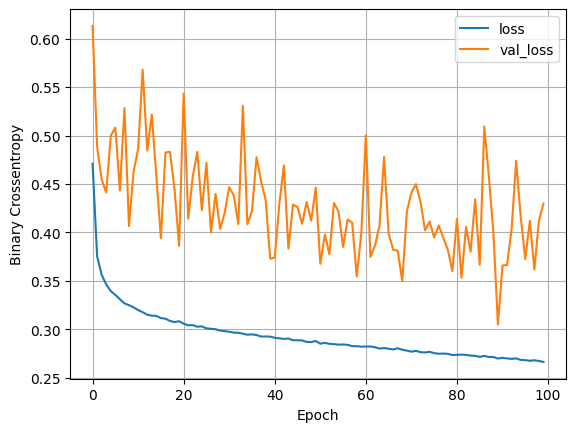

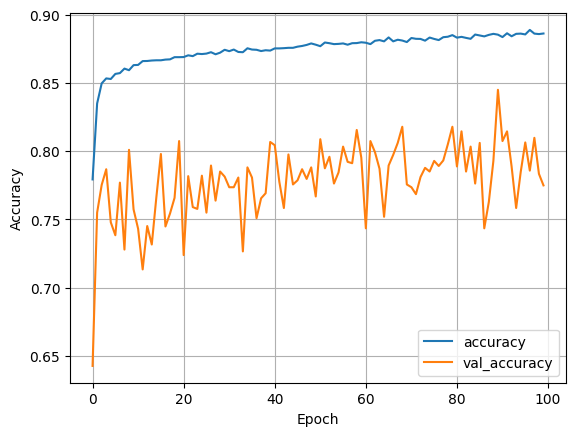

In [28]:
plot_loss(history, "Binary Crossentropy")
plot_accuracy(history, "Accuracy")

From these plots, it's visible that the loss steadily decreases and that the accuracy steadily increases, which are both good results. The loss represents, mathematically, how far off the model's predictions are as a whole. A decrease in loss means an increase in correct predictions. The accuracy looks at actual results versus predicted results. The loss starts at around 0.45 and decreases to around 0.26. The accuracy starts at around 0.8 and climbs to around 0.87.

It's also expected that the validation loss and accuracy perform worse than their original counterparts. The validation set is completely new data that the model hasn't seen yet, and thus has more difficulty with making predictions. As the model becomes more accustomed to the dat through training, results improve as seen, but mistakes will still be made.

In [29]:
# Creating a training function for a Tensorflow neural network
# Allows reuse for the upcoming grid search
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, num_epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation="relu", input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation="relu"),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])
    
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), 
                     loss="binary_crossentropy", 
                     metrics=["accuracy"])
    
    history = nn_model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, 
                           validation_split=0.2, verbose=0)
    
    return nn_model, history

In [30]:
# Creating a plotting function for the Tensorflow neural network results
# Allows reuse for the upcoming grid search
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(history.history["loss"], label="loss")
    ax1.plot(history.history["val_loss"], label="val_loss")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Binary crossentropy")
    ax1.grid(True)
    
    ax2.plot(history.history["accuracy"], label="accuracy")
    ax2.plot(history.history["val_accuracy"], label="val_accuracy")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Accuracy")
    ax2.grid(True)
    
    plt.show()

Nodes: 16, Dropout Prob: 0, LR: 0.01, Batch Size: 32


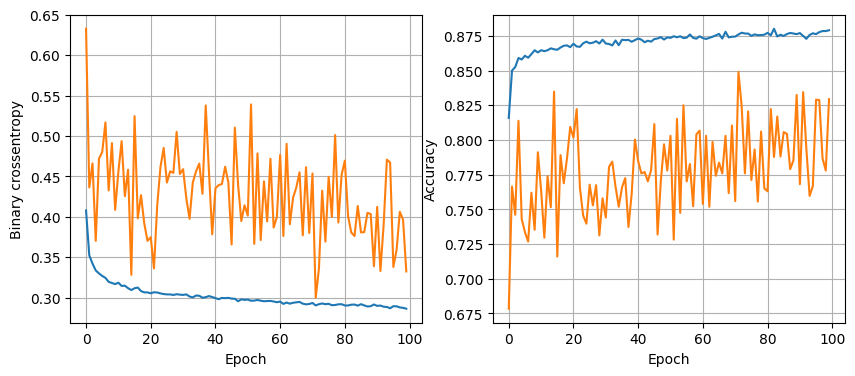

119/119 [==============================] - 0s 1ms/step - loss: 0.3126 - accuracy: 0.8738
Nodes: 16, Dropout Prob: 0, LR: 0.01, Batch Size: 64


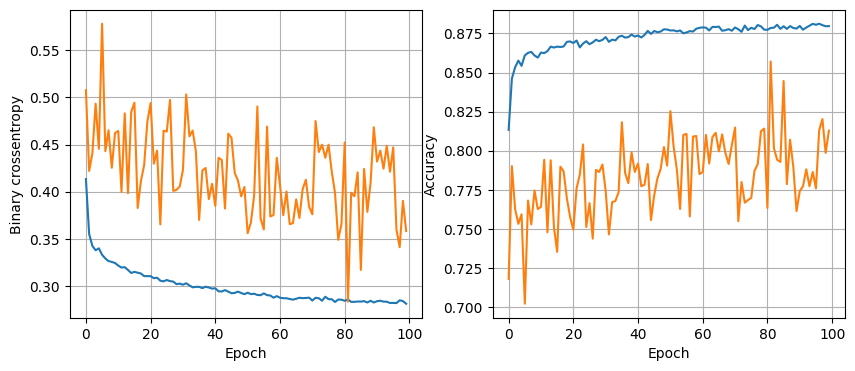

119/119 [==============================] - 0s 1ms/step - loss: 0.3010 - accuracy: 0.8743
Nodes: 16, Dropout Prob: 0, LR: 0.01, Batch Size: 128


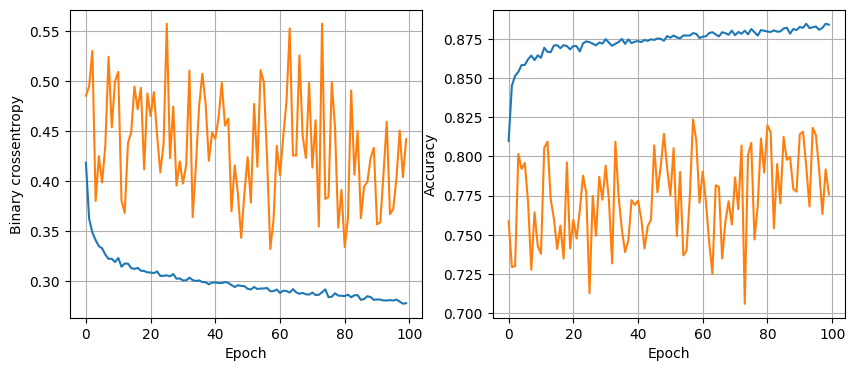

119/119 [==============================] - 0s 1ms/step - loss: 0.3079 - accuracy: 0.8757
Nodes: 16, Dropout Prob: 0, LR: 0.005, Batch Size: 32


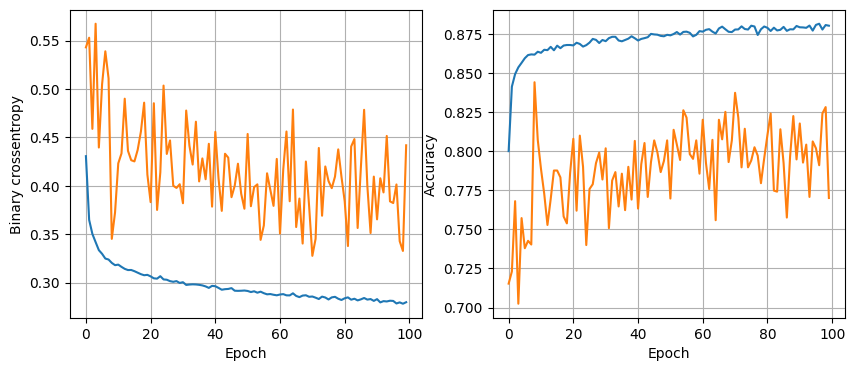

119/119 [==============================] - 0s 2ms/step - loss: 0.3244 - accuracy: 0.8686
Nodes: 16, Dropout Prob: 0, LR: 0.005, Batch Size: 64


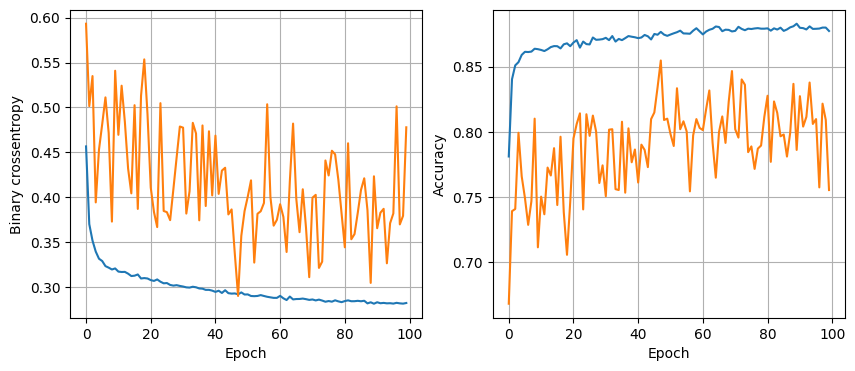

119/119 [==============================] - 0s 2ms/step - loss: 0.3054 - accuracy: 0.8778
Nodes: 16, Dropout Prob: 0, LR: 0.005, Batch Size: 128


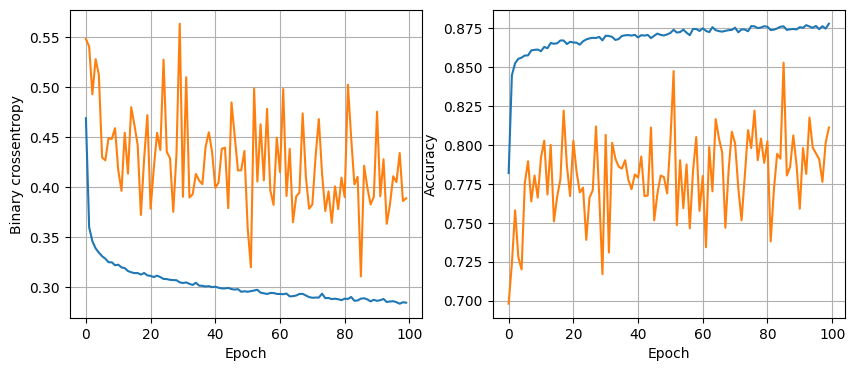

119/119 [==============================] - 0s 2ms/step - loss: 0.3049 - accuracy: 0.8741
Nodes: 16, Dropout Prob: 0, LR: 0.001, Batch Size: 32


119/119 [==============================] - 0s 2ms/step - loss: 0.3025 - accuracy: 0.8778
Nodes: 16, Dropout Prob: 0, LR: 0.001, Batch Size: 64


119/119 [==============================] - 0s 1ms/step - loss: 0.3020 - accuracy: 0.8759
Nodes: 16, Dropout Prob: 0, LR: 0.001, Batch Size: 128


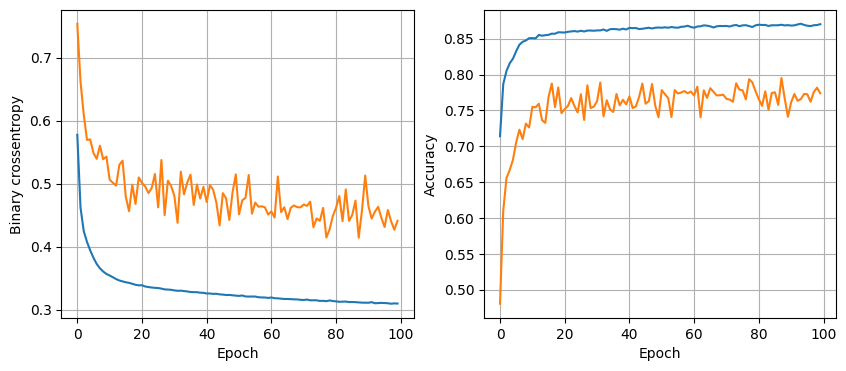

119/119 [==============================] - 0s 1ms/step - loss: 0.3138 - accuracy: 0.8767
Nodes: 16, Dropout Prob: 0.2, LR: 0.01, Batch Size: 32


119/119 [==============================] - 0s 2ms/step - loss: 0.3090 - accuracy: 0.8799
Nodes: 16, Dropout Prob: 0.2, LR: 0.01, Batch Size: 64


119/119 [==============================] - 0s 1ms/step - loss: 0.3120 - accuracy: 0.8728
Nodes: 16, Dropout Prob: 0.2, LR: 0.01, Batch Size: 128


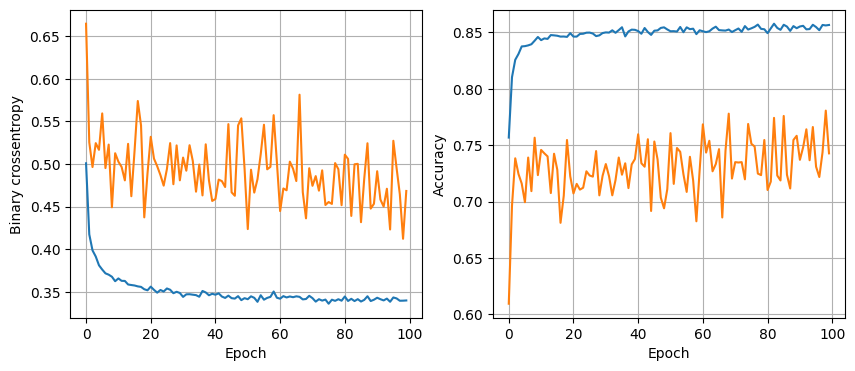

119/119 [==============================] - 0s 1ms/step - loss: 0.3030 - accuracy: 0.8791
Nodes: 16, Dropout Prob: 0.2, LR: 0.005, Batch Size: 32


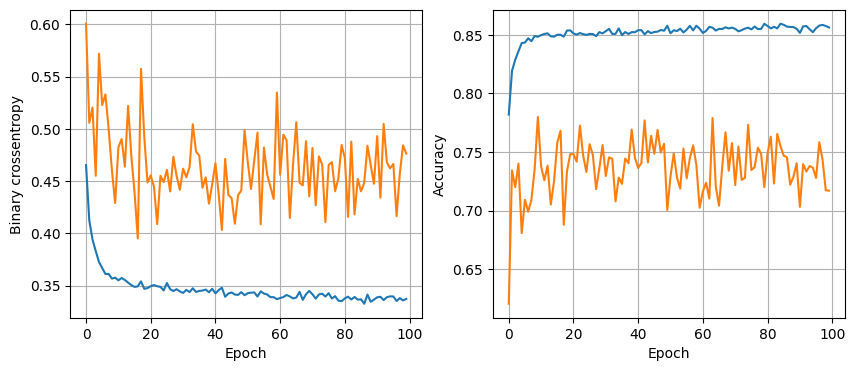

119/119 [==============================] - 0s 1ms/step - loss: 0.3105 - accuracy: 0.8762
Nodes: 16, Dropout Prob: 0.2, LR: 0.005, Batch Size: 64


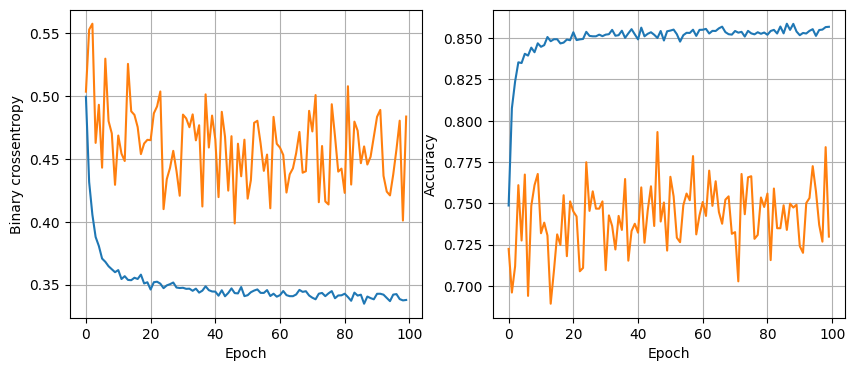

119/119 [==============================] - 0s 1ms/step - loss: 0.3090 - accuracy: 0.8754
Nodes: 16, Dropout Prob: 0.2, LR: 0.005, Batch Size: 128


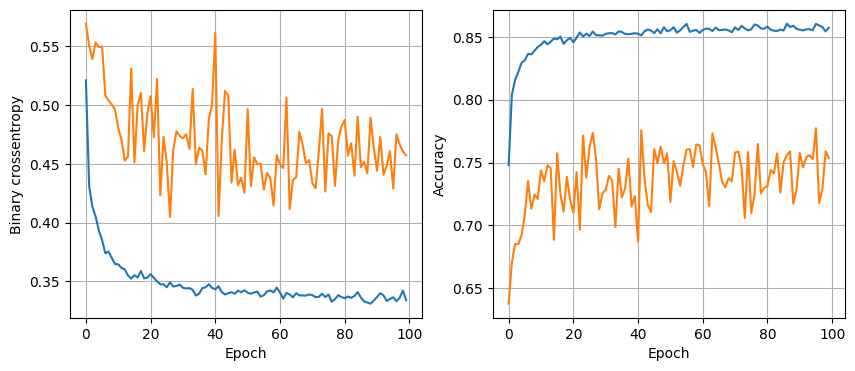

119/119 [==============================] - 0s 2ms/step - loss: 0.3049 - accuracy: 0.8746
Nodes: 16, Dropout Prob: 0.2, LR: 0.001, Batch Size: 32


119/119 [==============================] - 0s 2ms/step - loss: 0.3098 - accuracy: 0.8801
Nodes: 16, Dropout Prob: 0.2, LR: 0.001, Batch Size: 64


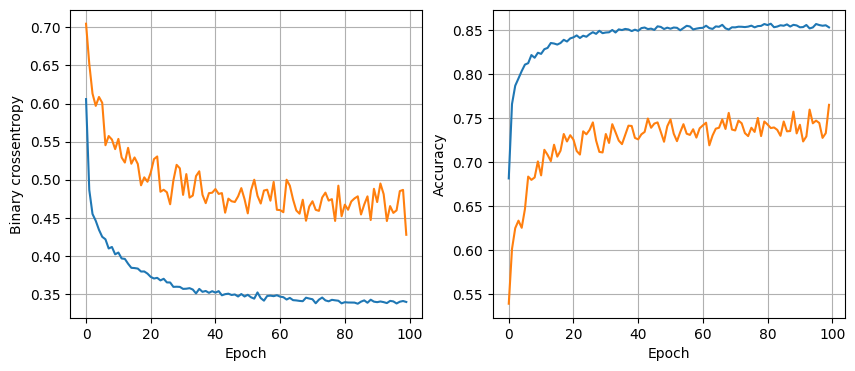

119/119 [==============================] - 0s 2ms/step - loss: 0.3087 - accuracy: 0.8793
Nodes: 16, Dropout Prob: 0.2, LR: 0.001, Batch Size: 128


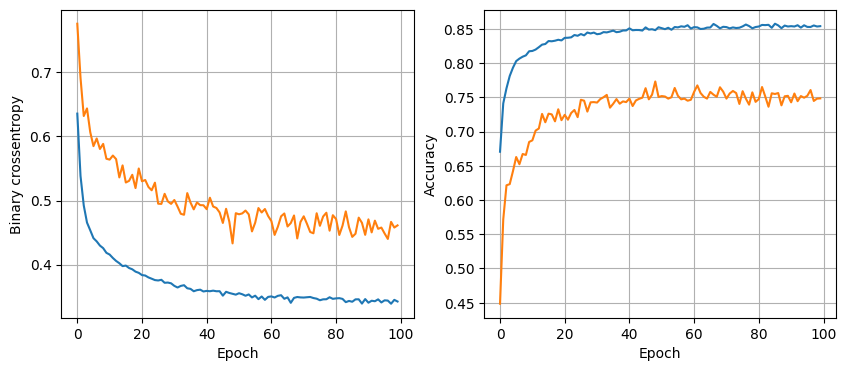

119/119 [==============================] - 0s 1ms/step - loss: 0.3097 - accuracy: 0.8775
Nodes: 32, Dropout Prob: 0, LR: 0.01, Batch Size: 32


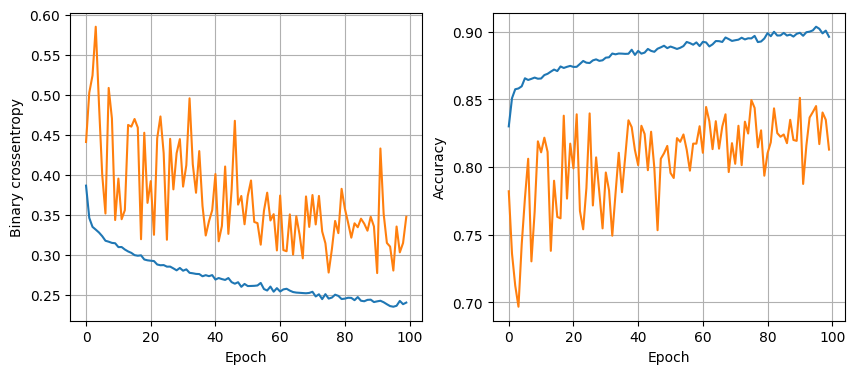

119/119 [==============================] - 0s 2ms/step - loss: 0.3649 - accuracy: 0.8636
Nodes: 32, Dropout Prob: 0, LR: 0.01, Batch Size: 64


119/119 [==============================] - 0s 2ms/step - loss: 0.3439 - accuracy: 0.8741
Nodes: 32, Dropout Prob: 0, LR: 0.01, Batch Size: 128


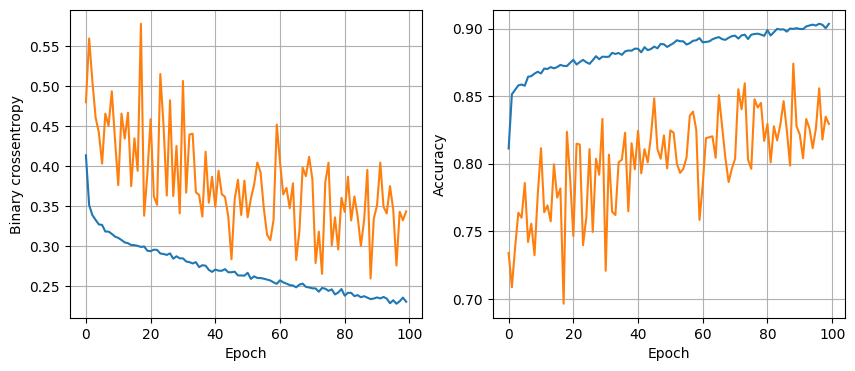

119/119 [==============================] - 0s 2ms/step - loss: 0.3461 - accuracy: 0.8733
Nodes: 32, Dropout Prob: 0, LR: 0.005, Batch Size: 32


119/119 [==============================] - 0s 2ms/step - loss: 0.3576 - accuracy: 0.8725
Nodes: 32, Dropout Prob: 0, LR: 0.005, Batch Size: 64


119/119 [==============================] - 0s 2ms/step - loss: 0.3401 - accuracy: 0.8701
Nodes: 32, Dropout Prob: 0, LR: 0.005, Batch Size: 128


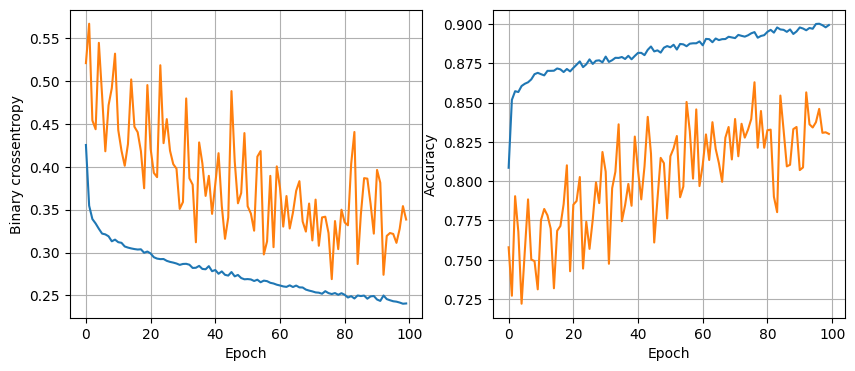

119/119 [==============================] - 0s 1ms/step - loss: 0.3206 - accuracy: 0.8759
Nodes: 32, Dropout Prob: 0, LR: 0.001, Batch Size: 32


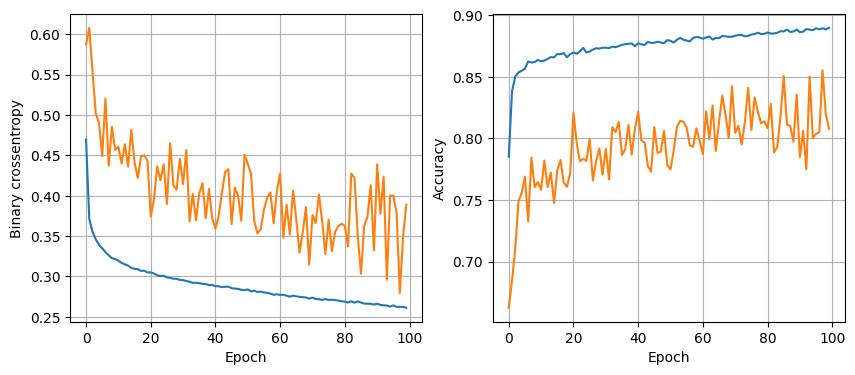

119/119 [==============================] - 0s 1ms/step - loss: 0.3034 - accuracy: 0.8830
Nodes: 32, Dropout Prob: 0, LR: 0.001, Batch Size: 64


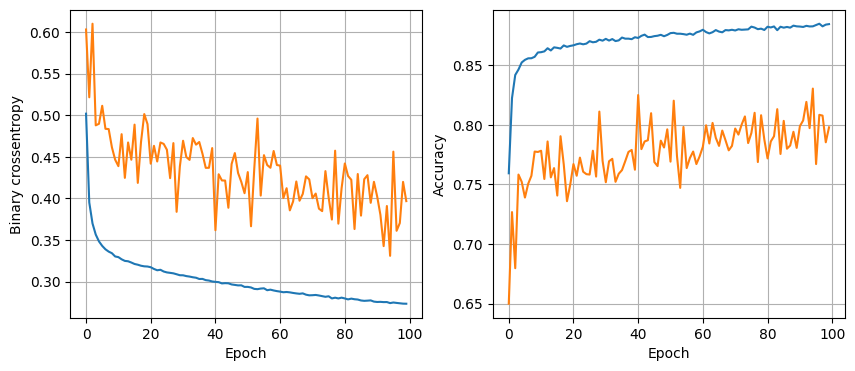

119/119 [==============================] - 0s 1ms/step - loss: 0.3010 - accuracy: 0.8807
Nodes: 32, Dropout Prob: 0, LR: 0.001, Batch Size: 128


119/119 [==============================] - 0s 1ms/step - loss: 0.3026 - accuracy: 0.8757
Nodes: 32, Dropout Prob: 0.2, LR: 0.01, Batch Size: 32


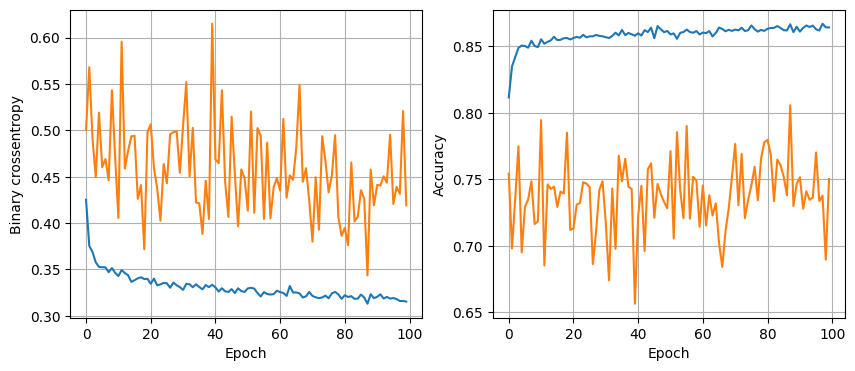

119/119 [==============================] - 0s 1ms/step - loss: 0.3048 - accuracy: 0.8757
Nodes: 32, Dropout Prob: 0.2, LR: 0.01, Batch Size: 64


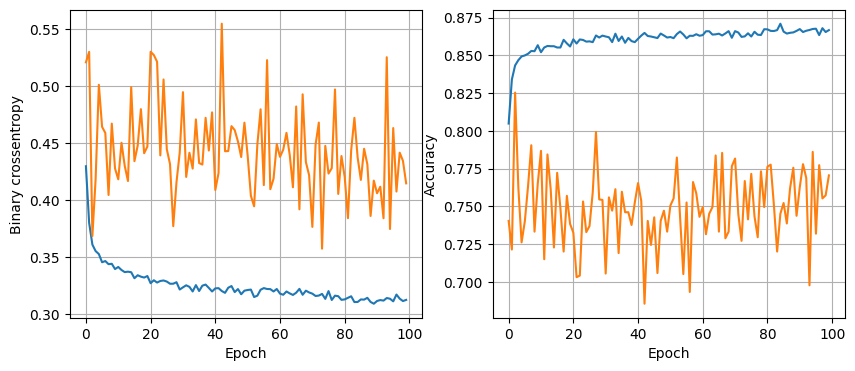

119/119 [==============================] - 0s 1ms/step - loss: 0.2979 - accuracy: 0.8770
Nodes: 32, Dropout Prob: 0.2, LR: 0.01, Batch Size: 128


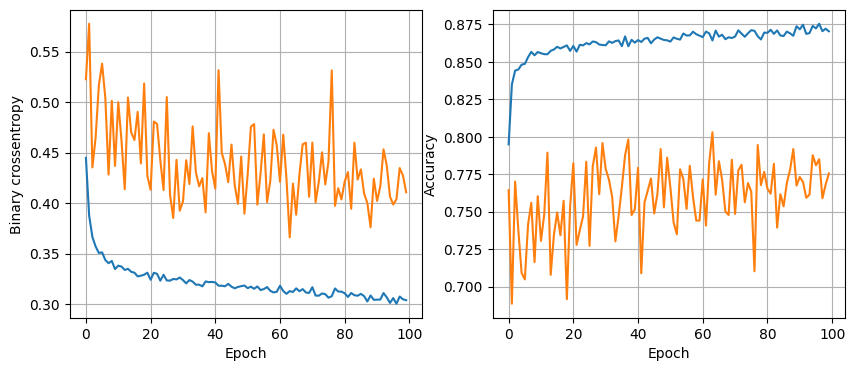

119/119 [==============================] - 0s 2ms/step - loss: 0.2954 - accuracy: 0.8843
Nodes: 32, Dropout Prob: 0.2, LR: 0.005, Batch Size: 32


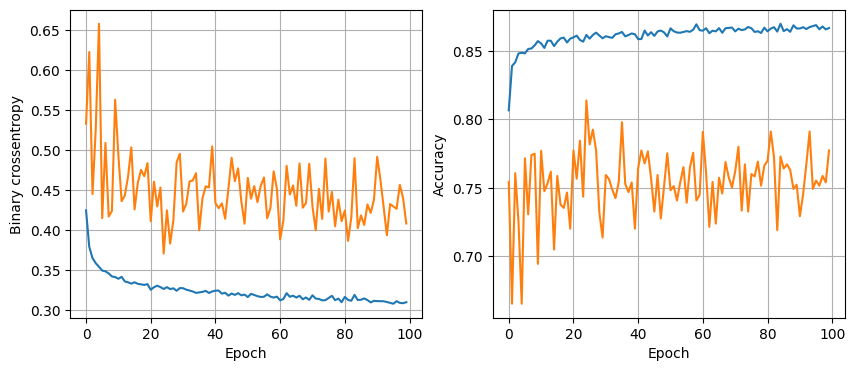

119/119 [==============================] - 0s 1ms/step - loss: 0.2967 - accuracy: 0.8767
Nodes: 32, Dropout Prob: 0.2, LR: 0.005, Batch Size: 64


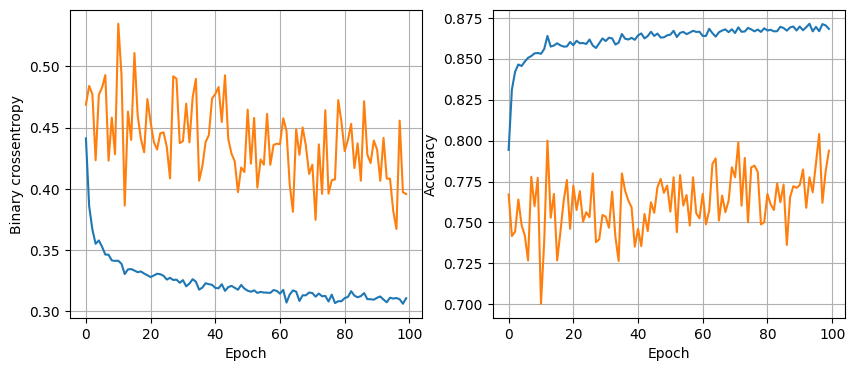

119/119 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.8825
Nodes: 32, Dropout Prob: 0.2, LR: 0.005, Batch Size: 128


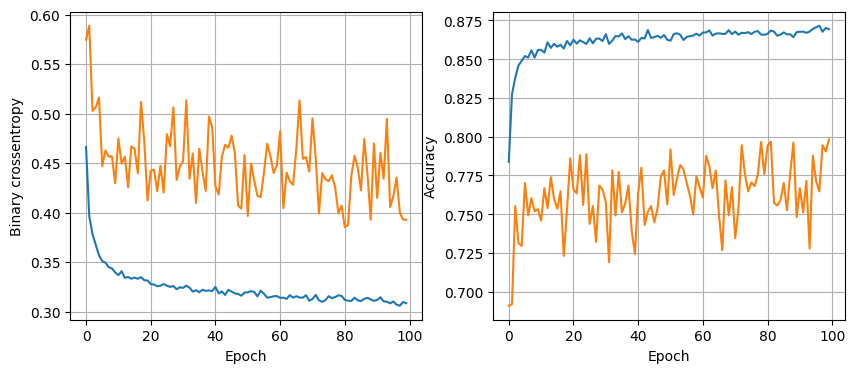

119/119 [==============================] - 0s 1ms/step - loss: 0.2981 - accuracy: 0.8785
Nodes: 32, Dropout Prob: 0.2, LR: 0.001, Batch Size: 32


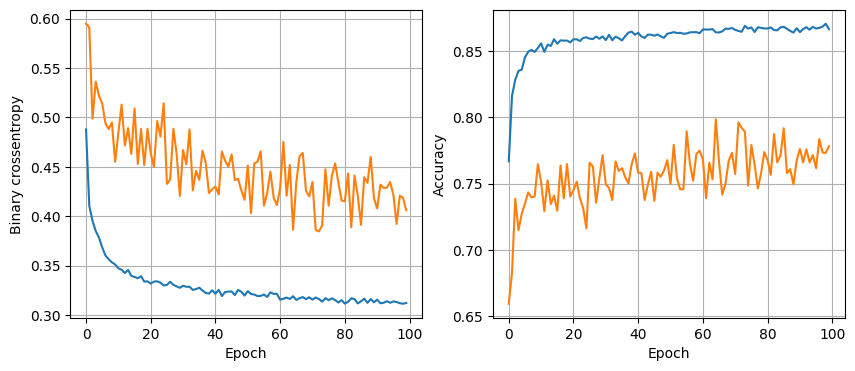

119/119 [==============================] - 0s 1ms/step - loss: 0.2960 - accuracy: 0.8846
Nodes: 32, Dropout Prob: 0.2, LR: 0.001, Batch Size: 64


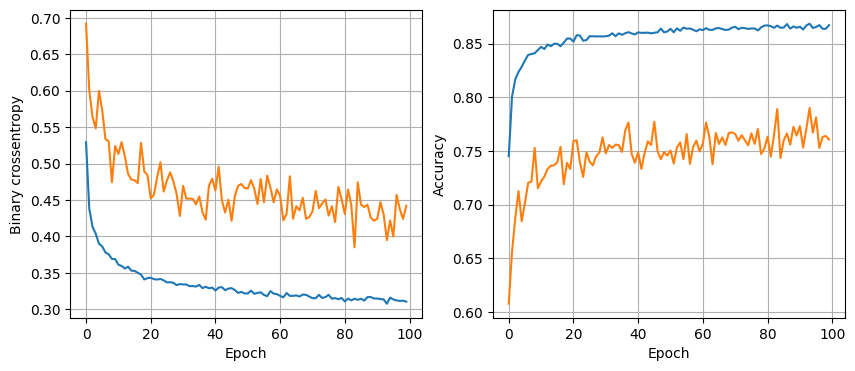

119/119 [==============================] - 0s 1ms/step - loss: 0.2933 - accuracy: 0.8783
Nodes: 32, Dropout Prob: 0.2, LR: 0.001, Batch Size: 128


119/119 [==============================] - 0s 1ms/step - loss: 0.2992 - accuracy: 0.8788
Nodes: 64, Dropout Prob: 0, LR: 0.01, Batch Size: 32


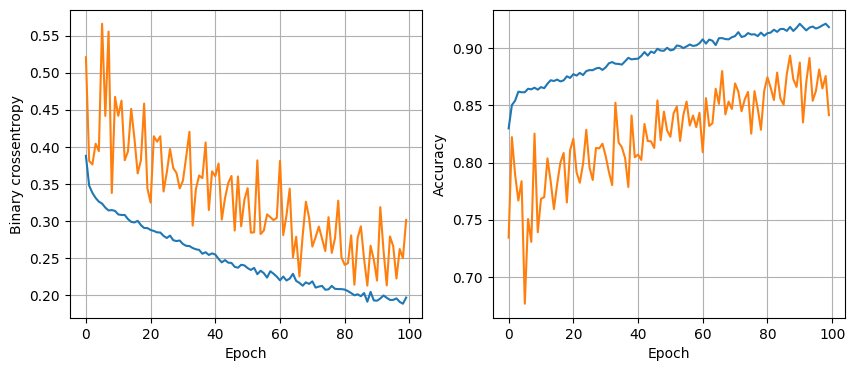

119/119 [==============================] - 0s 1ms/step - loss: 0.5426 - accuracy: 0.8623
Nodes: 64, Dropout Prob: 0, LR: 0.01, Batch Size: 64


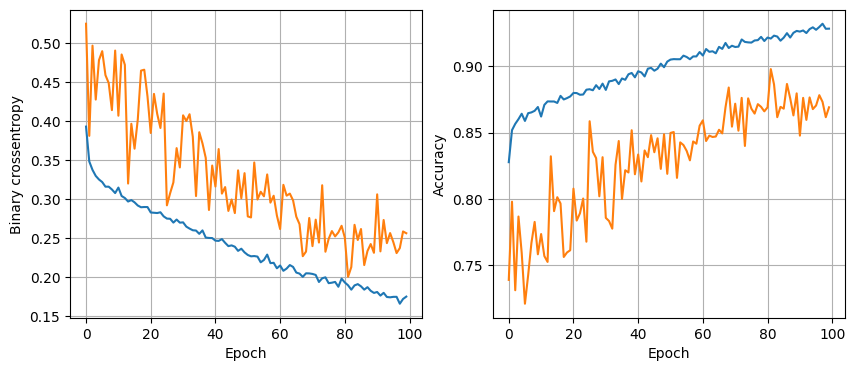

119/119 [==============================] - 0s 1ms/step - loss: 0.4961 - accuracy: 0.8630
Nodes: 64, Dropout Prob: 0, LR: 0.01, Batch Size: 128


119/119 [==============================] - 0s 1ms/step - loss: 0.5363 - accuracy: 0.8646
Nodes: 64, Dropout Prob: 0, LR: 0.005, Batch Size: 32


119/119 [==============================] - 0s 1ms/step - loss: 0.4938 - accuracy: 0.8625
Nodes: 64, Dropout Prob: 0, LR: 0.005, Batch Size: 64


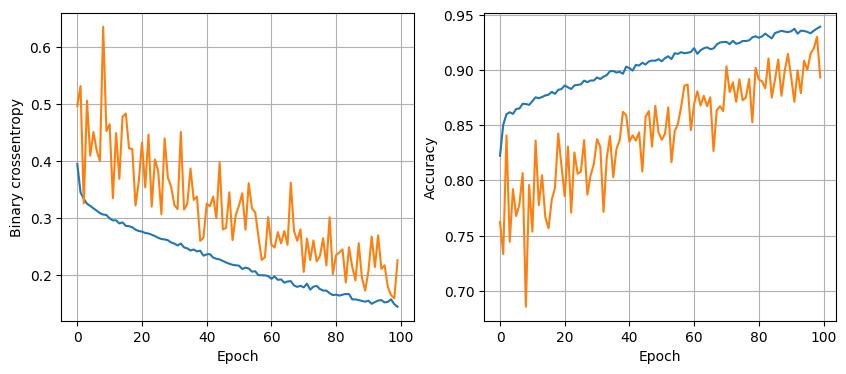

119/119 [==============================] - 0s 1ms/step - loss: 0.4968 - accuracy: 0.8657
Nodes: 64, Dropout Prob: 0, LR: 0.005, Batch Size: 128


119/119 [==============================] - 0s 1ms/step - loss: 0.4371 - accuracy: 0.8736
Nodes: 64, Dropout Prob: 0, LR: 0.001, Batch Size: 32


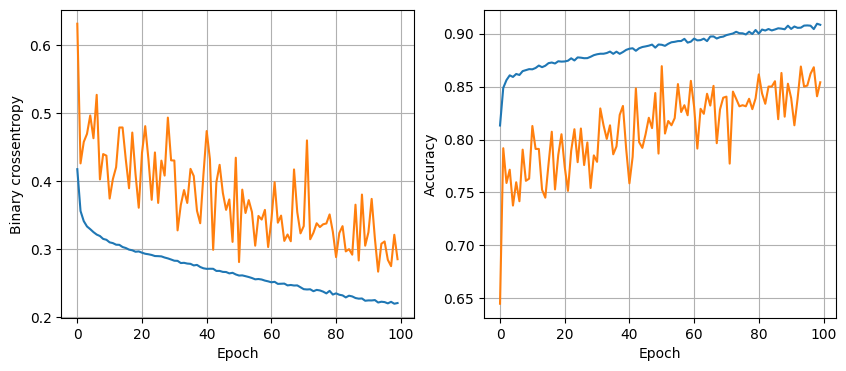

119/119 [==============================] - 0s 1ms/step - loss: 0.3494 - accuracy: 0.8649
Nodes: 64, Dropout Prob: 0, LR: 0.001, Batch Size: 64


119/119 [==============================] - 0s 1ms/step - loss: 0.3082 - accuracy: 0.8830
Nodes: 64, Dropout Prob: 0, LR: 0.001, Batch Size: 128


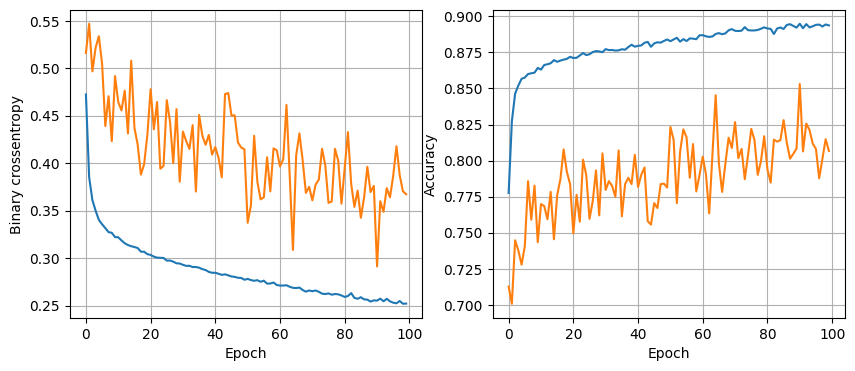

119/119 [==============================] - 0s 1ms/step - loss: 0.3116 - accuracy: 0.8738
Nodes: 64, Dropout Prob: 0.2, LR: 0.01, Batch Size: 32


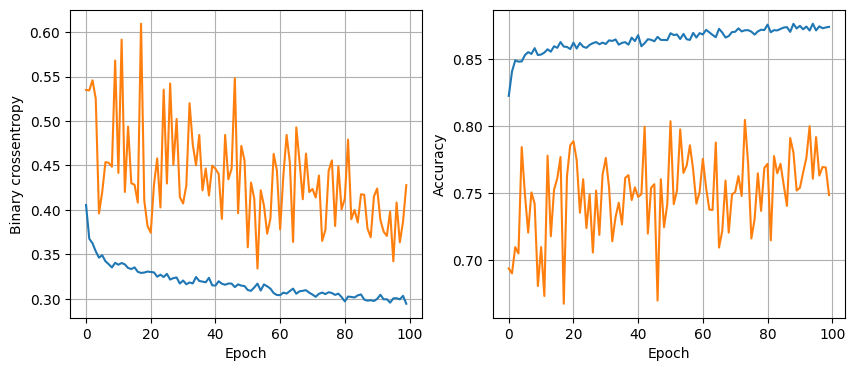

119/119 [==============================] - 0s 1ms/step - loss: 0.3058 - accuracy: 0.8749
Nodes: 64, Dropout Prob: 0.2, LR: 0.01, Batch Size: 64


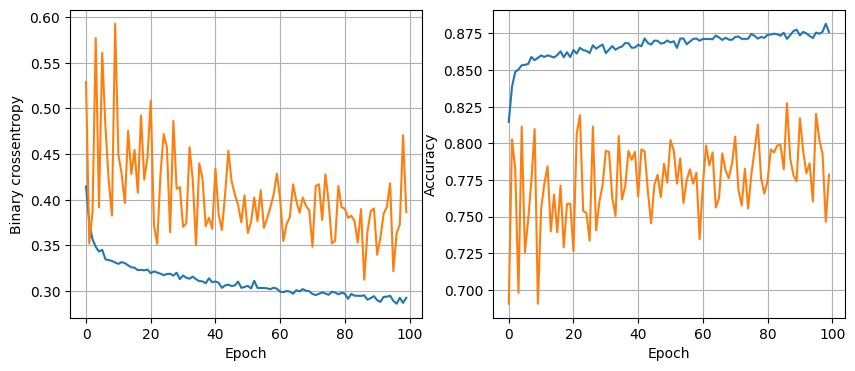

119/119 [==============================] - 0s 1ms/step - loss: 0.3053 - accuracy: 0.8767
Nodes: 64, Dropout Prob: 0.2, LR: 0.01, Batch Size: 128


119/119 [==============================] - 0s 1ms/step - loss: 0.2969 - accuracy: 0.8796
Nodes: 64, Dropout Prob: 0.2, LR: 0.005, Batch Size: 32


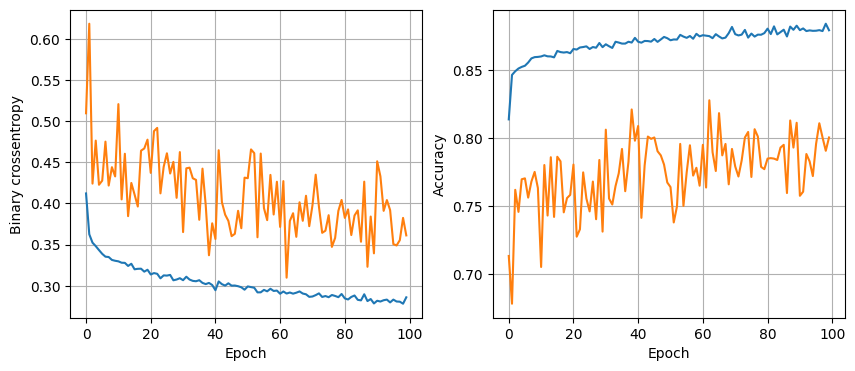

119/119 [==============================] - 0s 1ms/step - loss: 0.2956 - accuracy: 0.8809
Nodes: 64, Dropout Prob: 0.2, LR: 0.005, Batch Size: 64


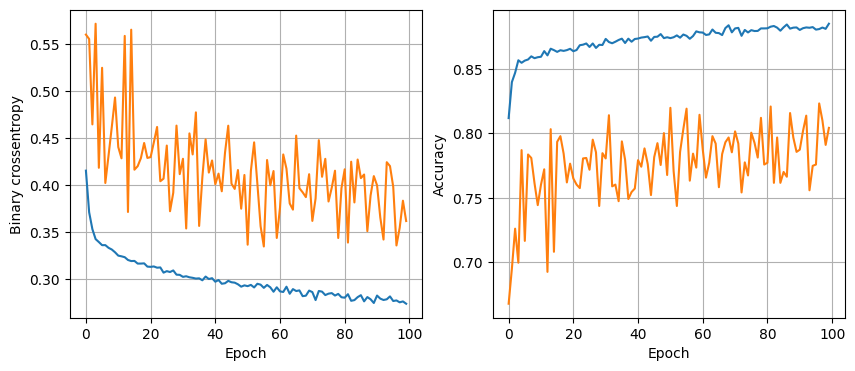

119/119 [==============================] - 0s 1ms/step - loss: 0.2959 - accuracy: 0.8788
Nodes: 64, Dropout Prob: 0.2, LR: 0.005, Batch Size: 128


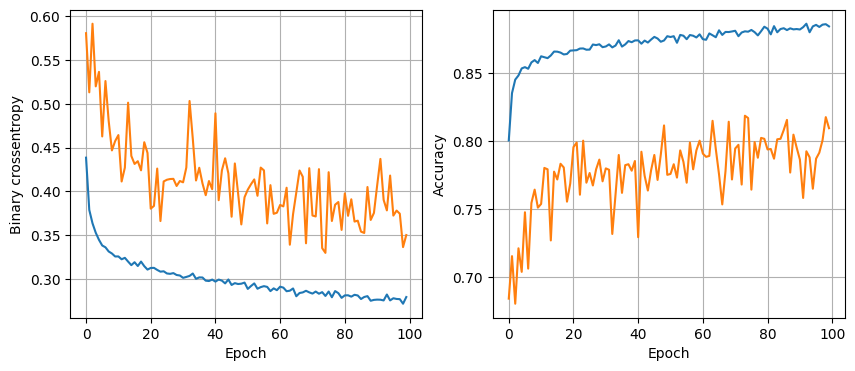

119/119 [==============================] - 0s 1ms/step - loss: 0.2933 - accuracy: 0.8867
Nodes: 64, Dropout Prob: 0.2, LR: 0.001, Batch Size: 32


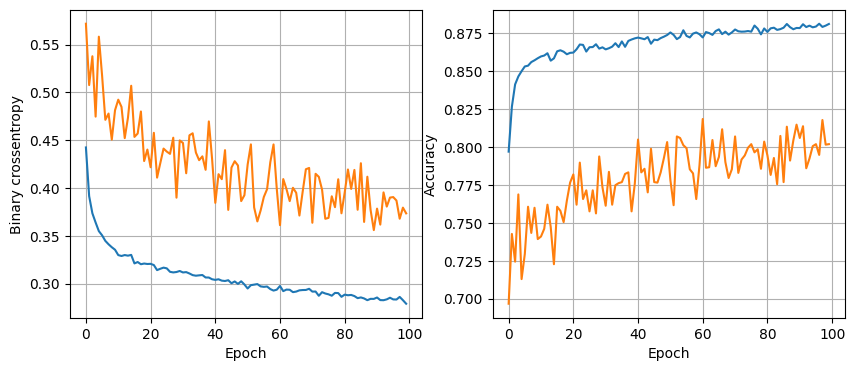

119/119 [==============================] - 0s 1ms/step - loss: 0.2858 - accuracy: 0.8828
Nodes: 64, Dropout Prob: 0.2, LR: 0.001, Batch Size: 64


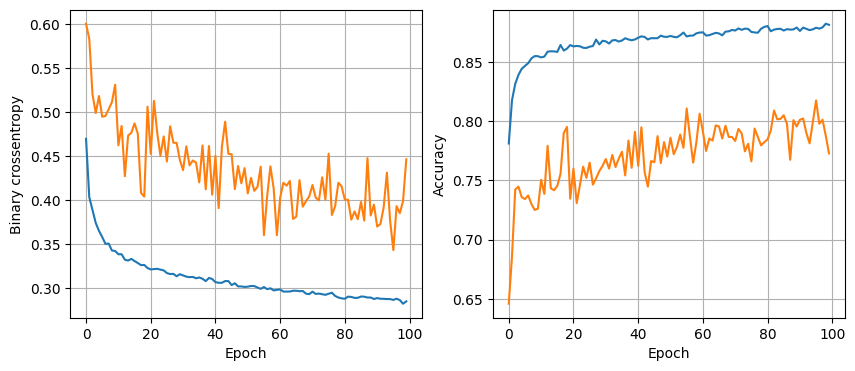

119/119 [==============================] - 0s 1ms/step - loss: 0.2839 - accuracy: 0.8851
Nodes: 64, Dropout Prob: 0.2, LR: 0.001, Batch Size: 128


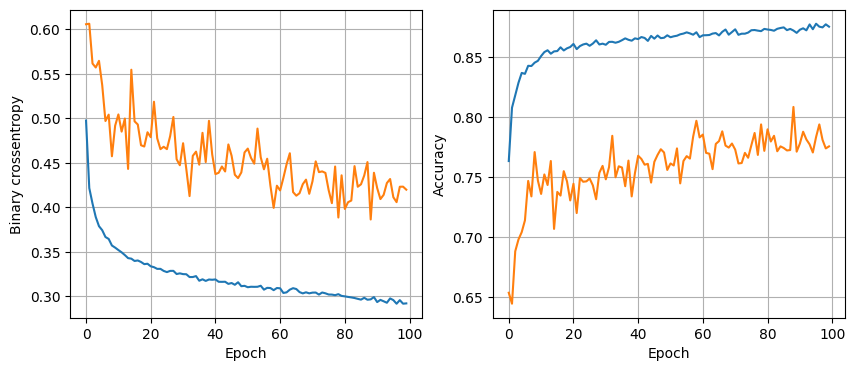

119/119 [==============================] - 0s 1ms/step - loss: 0.2887 - accuracy: 0.8801


In [31]:
# Grid search to find the best model configuration based on several hyperparameters
least_val_loss = float("inf")
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"Nodes: {num_nodes}, Dropout Prob: {dropout_prob}, LR: {lr}, Batch Size: {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_test, y_test)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

In [32]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 978us/step


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1324
           1       0.87      0.96      0.92      2480

    accuracy                           0.89      3804
   macro avg       0.89      0.85      0.87      3804
weighted avg       0.89      0.89      0.88      3804



This neural network managed to achieve a very high overall accuracy, and its precision, recall, and f1 values have improved as well. This result proves that a neural network is a viable solution for this kind of problem.

## Linear Regression <a name="linear" />

<img src="images/linearregression.png" />

The goal of regression is to find the best fitting line that best models the available data. In regression problems, new values for X may occur, and the goal is then to find the best corresponding Y value for this new data. In linear regression, it's the intent to fit a linear model on the data. The above graph is an example of such a line that could be drawn through the data.

Such a simple line is modelled by the following equation:

$\Large y=b_0+b_1x$

Here, $b_0$ is the y-intercept and $b_1$ represents the slope as it's a coefficient of $x$.

Naturally, such a line is not drawn randomly, and several mathematical processes and concepts are used to conclude where the regression line should be. The first important concept is that of residuals, which concerns itself with the difference between actual values and predicted values.

<img src="images/residual.png" />

In the above image, $Y_8$ represents the eigth data point of the dataset, and $\hat{y_8}$ represents the predicted value as it's on the regression line. The residual, or error, is then the difference between these two values (represented by the blue shaded area). This difference is found with:

$\Large |y_8-\hat{y}_8|$

As values can be negative depending on position in the graph, the absolute value must be taken. The best fitting line is generally trying to decrease the residuals/errors as much as possible for all the different data points. This could mean minimizing the sum of all residuals. It could also mean minimizing the squares value of the sum of all residuals. This would attach a higher penalty to data points that are far away from the regression line. Which one to use depends on the circumstances.

The above example is an example of simple linear regression. There also exists multiple linear regression, which calculates coefficients for all of the different values of $x$ in a vector to use for the prediction of values. Multiple linear regression may look something like:

$\Large y=b_0+b_1x_1+b_2x_2+...+b_nx_n$

When working with linear regressions, there are various assumptions that can be made, which are:

- Linearity
- Independence
- Normality
- Homoskedasticity

The first assumption, linearity, assumes that for linear regression, the data needs to follow a linear trajectory. If the data is of a non-linear shape, it will not be possible to properly fit a linear line through it.

The second assumption, independence, assumes that one data point should not have any influence on another data point. In other words, all sample should not rely on another or affect one another.

The third and fourth assumptions, normality and homoskedasticity, both have assumptions about the residuals instead. Normality assumes that the residuals are normally distributed along the best fitting line. Homoskedasticity assumes that the variance of data points in a residual plot should remain constant.

<img src="images/assumptions.png" />

Now what can be used to evaluate a linear regression model? There are various ways of doing this. One such method is the Mean Absolute Error (MAE). The MAE sums up all distances/errors and takes the average value, which can describe how far off the predictions are from actual values on average. The equation for MAE is:

$\Large{\sum\limits_{i=1}^n|y_i-\hat{y}_i|\over n}=MAE$

Another method that is closely related to MAE is the Mean Squared Error (MSE). Instead of taking the absolute value of errors, they are squared instead. This method helps to punish large errors in the predictions. Note that squared values are always positive regardless, so taking the absolute value is not unnecessary. The equation for MSE is:

$\Large{\sum\limits_{i=1}^n(y_i-\hat{y}_i)^2\over n}=MSE$

A downside of MSE is that the resulting values may not make much sense when compared to actual values. For example when the data is about euros. Squared euro values do not make much sense from a human perspective and comparison becomes difficult. For this reason, the Root Mean Squared Error (RMSE) was created, which takes the root of RMSE. The equation for RMSE is:

$\Large\sqrt{\sum\limits_{i=1}^n(y_i-\hat{y}_i)^2\over n}=RMSE$

This RMSE ensures that resulting values are in the same unit measure so that comparison is easily possible again.

Another method of evaluation is known as the Coefficient of Determination ($R^2$). The equation for $R^2$ is:

$\Large 1-{RSS\over TSS}=R^2$

RSS stands for the sum of squared residuals. TSS stands for the total sum of squares. The equations for RSS and TSS are:

$\large\sum\limits_{i=1}^n(y_i-\hat{y}_i)^2=RSS \hspace{35pt} \sum\limits_{i=1}^n(y_i-\bar{y})^2=TSS$

RSS takes the sum of all the squared errors, which is reminiscent of the MSE, without the division by $n$. The TSS takes the sum of all values minus, for all values, the mean of all values, squared. So RSS looks at how far apart predicted values and actual values are, and TSS looks at how far apart actual values are from the mean. When evaluating $R^2$ results, it generally means that a value closer to 1 is a sign of having a good predictor.

There are more ways to evaluate linear regressions, but these are some of the more common ones.

In [34]:
# Bikes in Seoul dataset
cols=["bike_count", "hour", "temp", "humidity", "wind", "visibility", 
      "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df=pd.read_csv("data/SeoulBikeData.csv", encoding='latin1').drop(["Date", "Holiday", "Seasons"], axis=1)
df.columns = cols
df["functional"] = (df["functional"] == "Yes").astype(int)
df = df[df["hour"] == 12]
df = df.drop(["hour"], axis=1)

In [35]:
df.head()

bike_count  temp  humidity  wind  visibility  dew_pt_temp  radiation  \
12          449   1.7        23   1.4        2000        -17.2       1.11   
36          479   4.3        41   1.3        1666         -7.8       1.09   
60          333   5.8        85   1.7         349          3.4       0.43   
84          393  -0.3        38   4.8        1823        -12.9       1.11   
108         321  -2.3        25   0.0        1962        -19.7       0.00   

     rain  snow  functional  
12    0.0   0.0           1  
36    0.0   0.0           1  
60    0.0   0.0           1  
84    0.0   0.0           1  
108   0.0   0.0           1

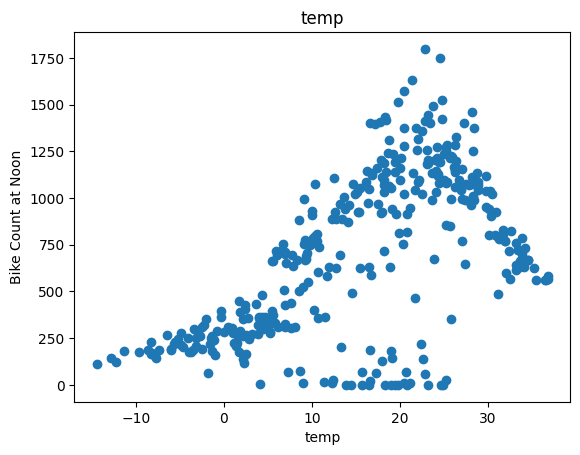

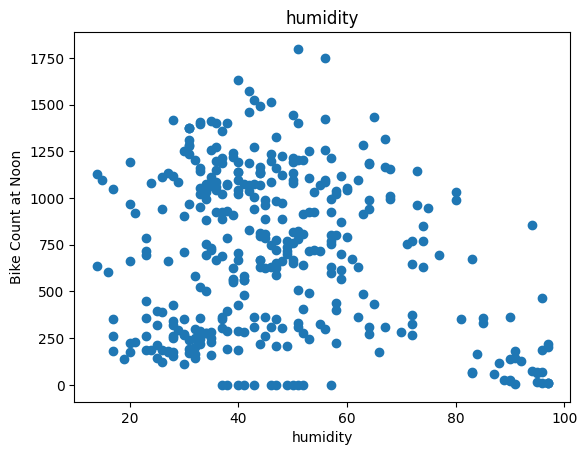

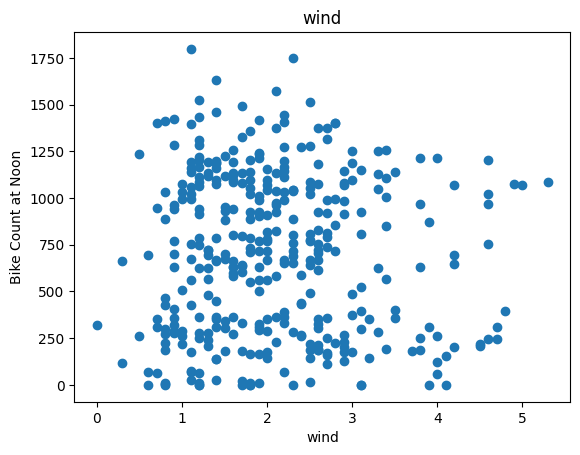

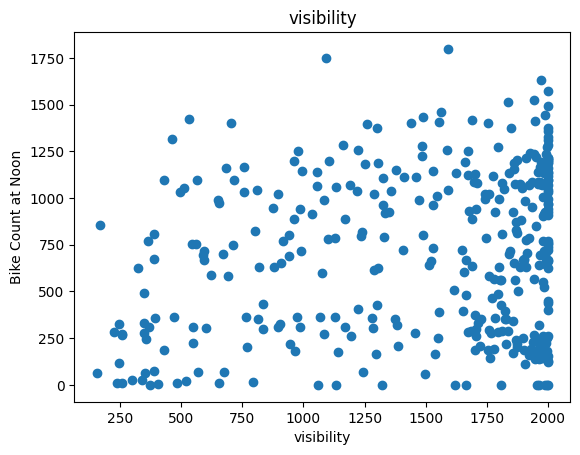

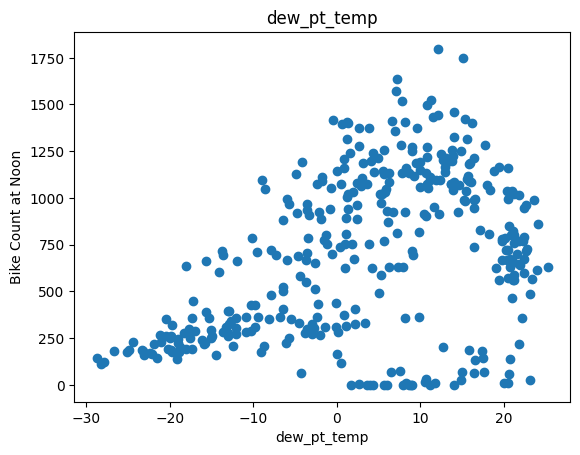

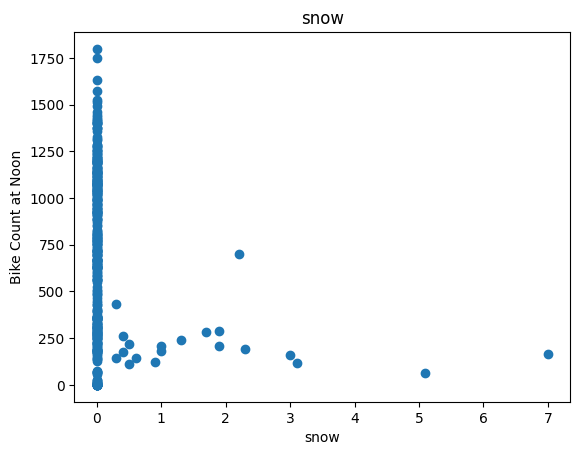

In [36]:
for label in df.columns[1:]:
    plt.scatter(df[label], df["bike_count"])
    plt.title(label)
    plt.ylabel("Bike Count at Noon")
    plt.xlabel(label)
    plt.show()

Some of the relationships between features of this bike dataset are non-existant, but some of the relationships show a type of pattern. Thus, some of the features cannot be used, either due to non-linearity or the relationship not making sense, and others do look promising. This is important to keep in mind for the upcoming neural network!

In [37]:
# Dropping useless features
df = df.drop(["wind", "visibility", "functional"], axis=1)

In [38]:
df.head()

bike_count  temp  humidity  dew_pt_temp  radiation  rain  snow
12          449   1.7        23        -17.2       1.11   0.0   0.0
36          479   4.3        41         -7.8       1.09   0.0   0.0
60          333   5.8        85          3.4       0.43   0.0   0.0
84          393  -0.3        38        -12.9       1.11   0.0   0.0
108         321  -2.3        25        -19.7       0.00   0.0   0.0

In [39]:
# Creating train, validation, and test splits of the data using numpy
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [40]:
def get_xy(dataframe, ylabel, xlabel=None):
    dataframe = copy.deepcopy(dataframe)
    if not xlabel:
        X = dataframe[[c for c in dataframe.columns if c != ylabel]].values
    else:
        if len(xlabel) == 1:
            X = dataframe[xlabel[0]].values.reshape(-1, 1)
        else:
            X = dataframe[xlabel].values
            
    y = dataframe[ylabel].values.reshape(-1, 1)
    data = np.hstack((X, y))
    
    return data, X, y

In [41]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", xlabel=["temp"])
_, X_val_temp, y_val_temp = get_xy(val, "bike_count", xlabel=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", xlabel=["temp"])

In [42]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

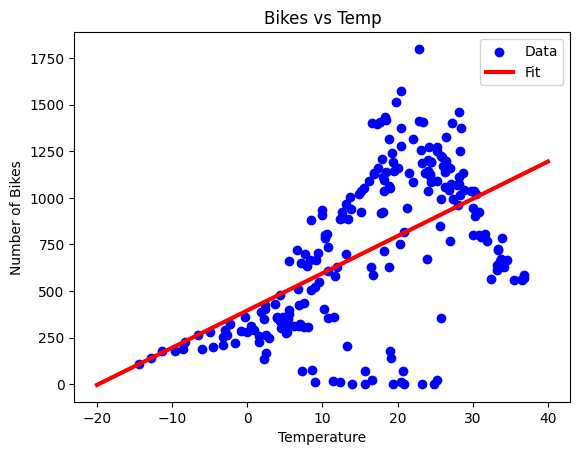

In [43]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temperature")
plt.show()

In [44]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [45]:
# Creation of a neural network with Tensorflow
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [46]:
# Compile the neural network
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss="mean_squared_error")

In [47]:
# Training the neural network
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), 
    y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(X_val_temp, y_val_temp)
)

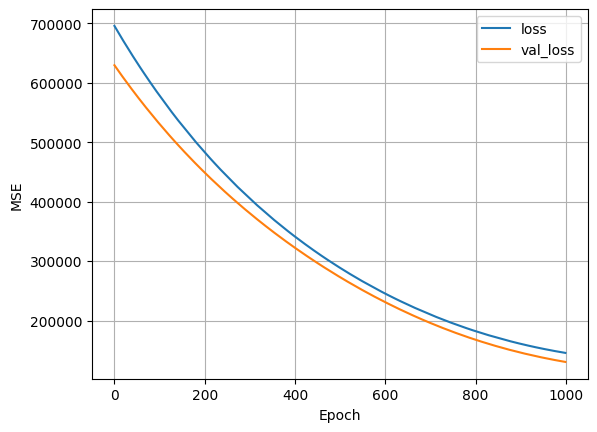

In [48]:
plot_loss(history, "MSE")

4/4 [==============================] - 0s 2ms/step


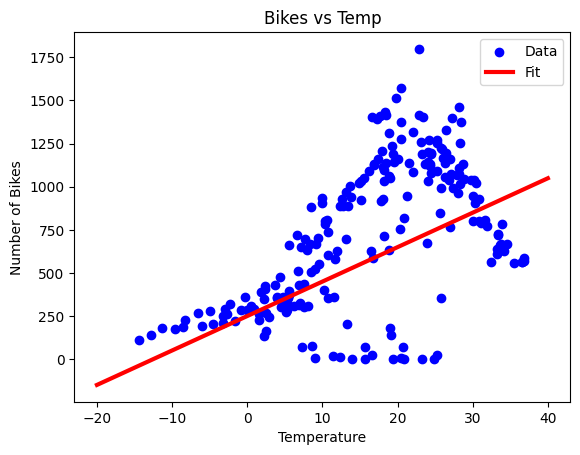

In [49]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temperature")
plt.show()

The above implementation uses a neural network with only a single node in its hidden layer to show the power of a very simple neural network. However, neural networks are often much more complex and sophisticated. There will be more hidden layers, more neurons, more efficient activation functions, etc. A slightly more complex neural network can be created, utilized, and evaluated to show differences in results.

In [50]:
# Creating the slightly more complex neural network
nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [51]:
# Compiling the neural network
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mean_squared_error")

In [52]:
# Training the neural network
history = nn_model.fit(
    X_train_temp.reshape(-1), 
    y_train_temp,
    verbose=0,
    epochs=100,
    validation_data=(X_val_temp, y_val_temp)
)

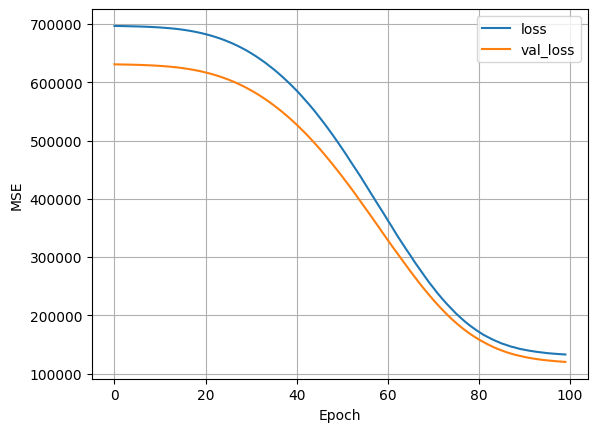

In [53]:
plot_loss(history, "MSE")

4/4 [==============================] - 0s 2ms/step


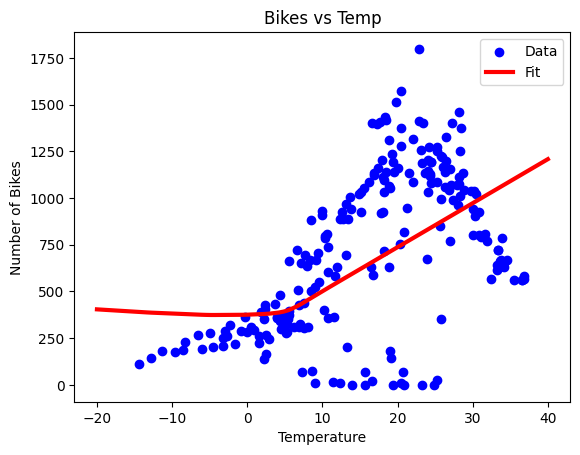

In [54]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temperature")
plt.show()

The results show that the regression line is no longer linear. This happened due to the introduction of ReLU (Rectified Linear Unit) as the activation function inside of the neural network's layers. Overall, the fit is not ideal. There's also not too much data to work with on the left side of the visualization, which hamper's the model's capability to produce a fitting line. Overall, this example is meant to illustrate that even though neural networks are powerful, their customizability introduces complexity as well. When working with neural networks, it will often require many iterations and different methods of testing to discover a model that works best.

## Unsupervised Learning <a name="unsupervised" />

Unsupervised learning, also known as unsupervised machine learning, uses machine learning algorithms to analyze and cluster unlabeled datasets. These algorithms discover hidden patterns or data groupings without the need for human intervention. Its ability to discover similarities and differences in information make it the ideal solution for exploratory data analysis, cross-selling strategies, customer segmentation, and image recognition.

It has many similarities with supervised learning, but the most important difference is thus that the model will discover relations and correlations by itself, without being explicitly told what they should be.

## K-means Clustering <a name="k-means" />

<img src="images/k-means.png" />

K-means Clustering attempts to find a number of K clusters inside of the data. It is a method of unsupervised learning. The above example shows a scatter plot with various data points. If the K would be set to 2, the model would try to find 2 clusters in the available data, which would likely be the red circles. If the K would be set to 3, the model would try to find 3 clusters in the available data, which would likely be the purple circles. What the K is set to is predefined by the creator of the model.

While the example is visually very simple, the model itself uses mathematical calculations to determine which cluster each data point will belong to. Overall, the model proceeds through these steps:

- Choose K random points to be centroids
- Calculate distance between data points and centroids, assigning points to closest centroid
- Compute new centroids

The model first chooses K random locations in the graph. The purpose of the centroid is to become the center location of each cluster. It then calculates distance between each data point and each centroid. Each data point will be considered to belong to the centroid's cluster that it is the closest to. After each data point has been assigned, new centroids are chosen. This is done based on average of all data points belonging to each cluster, respectively. The point of this step is to find a new location that is a more accurate centre of a cluster's territory.

<img src="images/centroids.png" />

After new centroids are found, the same process can be repeated so that new territories are shaped, potentially updating each data point's affiliation with the centroids.

<img src="images/centroidsnew.png" />

The model converges when it begins to iterate through these steps and clusters no longer seem to change. At that point, the clusters have been found, each data point has an accurate affiliation with the right cluster. This process is referred to as expectation maximisation. Assigning data points to a cluster/centroid is the expectation part, and computing new centroids is the maximisation part.

In [55]:
cols = ["area", "perimeter", "compactness", "length", "width", "asymmetry", "groove", "class"]
df = pd.read_csv("data/seeds_dataset.txt", names=cols, sep="\s+")

In [56]:
df.head()

area  perimeter  compactness  length  width  asymmetry  groove  class
0  15.26      14.84       0.8710   5.763  3.312      2.221   5.220      1
1  14.88      14.57       0.8811   5.554  3.333      1.018   4.956      1
2  14.29      14.09       0.9050   5.291  3.337      2.699   4.825      1
3  13.84      13.94       0.8955   5.324  3.379      2.259   4.805      1
4  16.14      14.99       0.9034   5.658  3.562      1.355   5.175      1

For this example, pretend that the class feature does not exist, turning the dataset into an unsupervised problem.

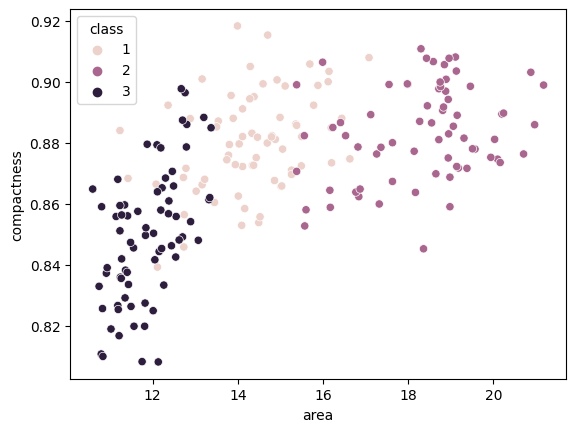

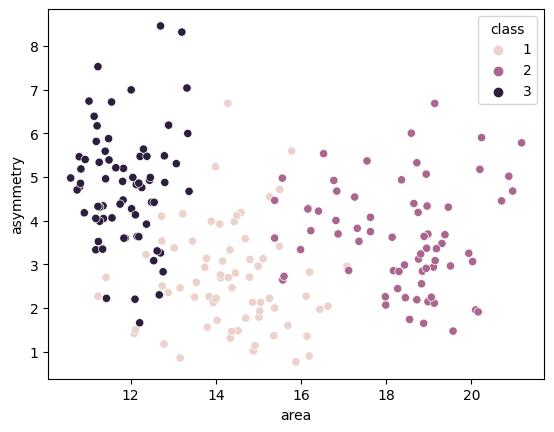

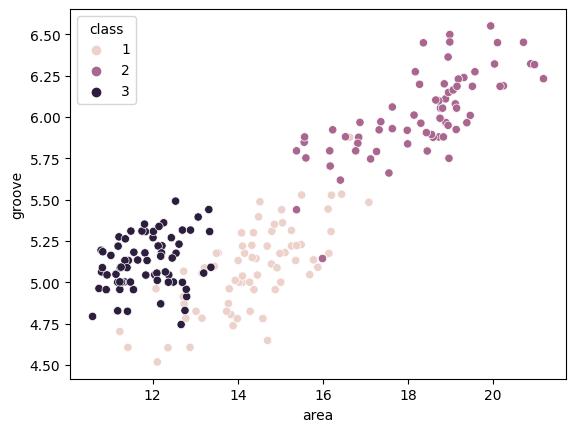

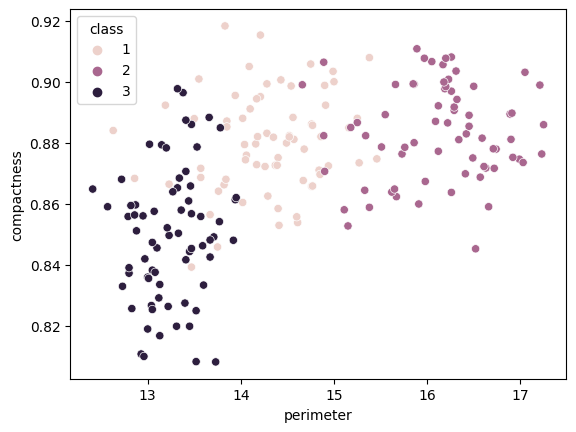

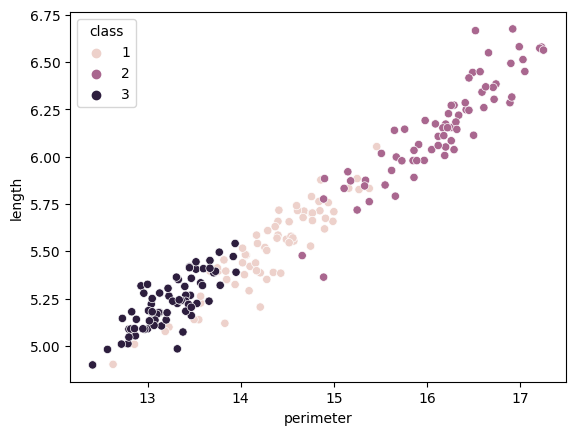

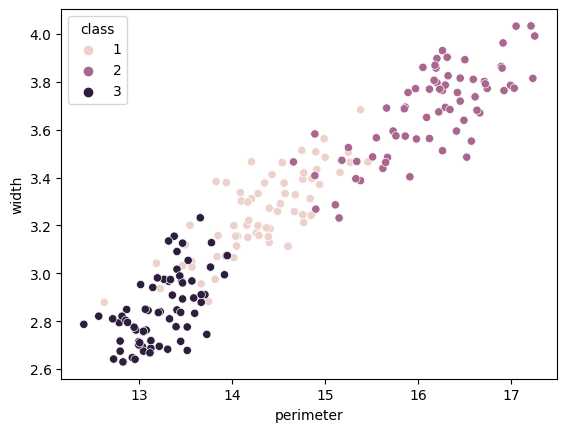

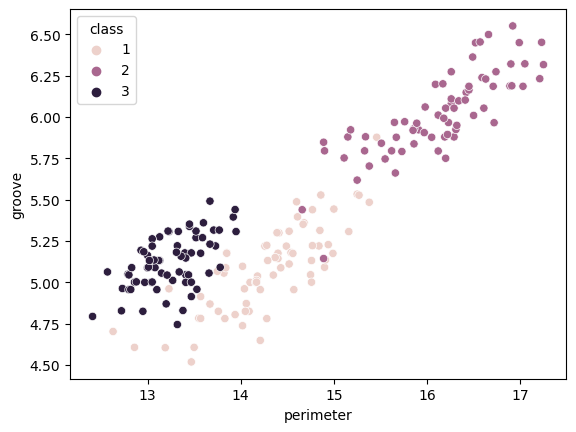

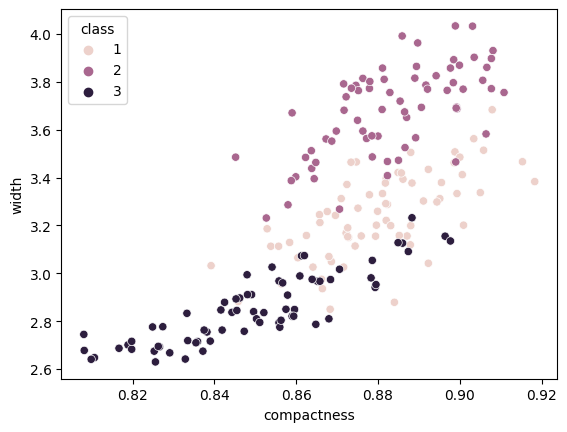

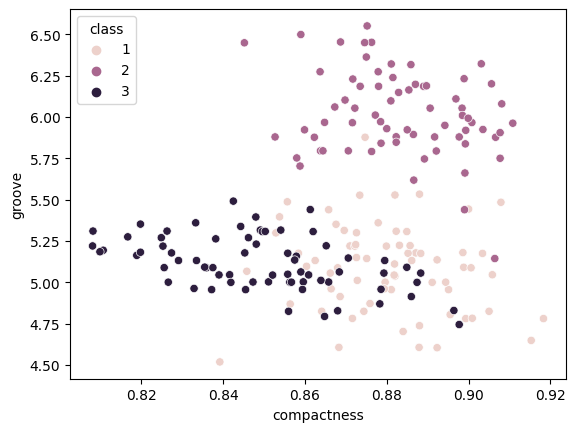

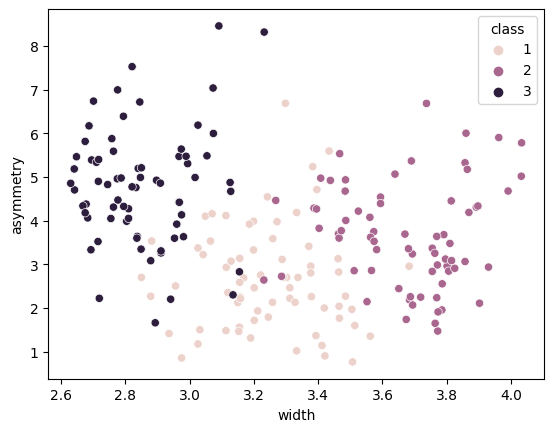

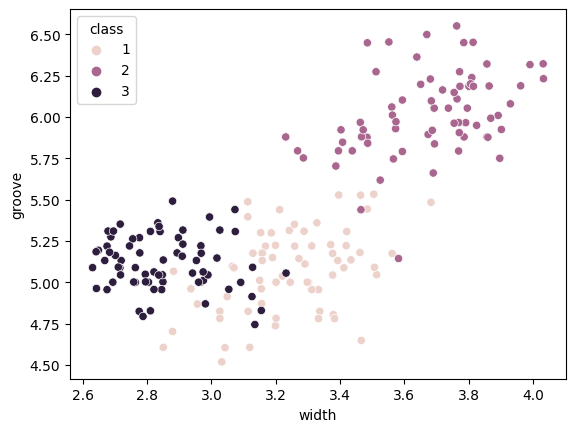

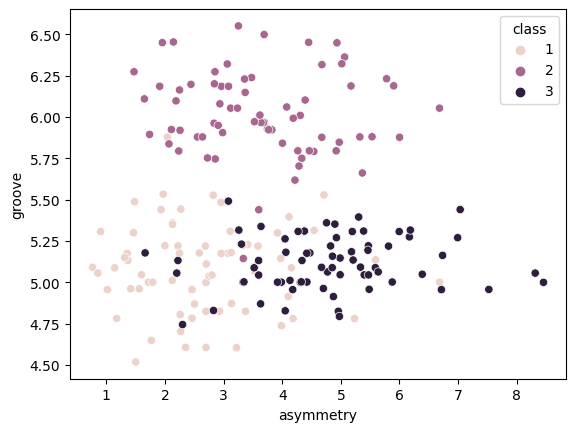

In [57]:
# Plotting every feature of the seeds dataset against each other
for i in range(len(cols)-1):
    for j in range(i+1, len(cols)-1):
        xlabel = cols[i]
        ylabel = cols[j]
        sn.scatterplot(x=xlabel, y=ylabel, data=df, hue="class")
        plt.show()

In [58]:
x = "perimeter"
y = "asymmetry"
X = df[[x, y]].values

In [59]:
kmeans = KMeans(n_clusters = 3, n_init="auto")
kmeans = kmeans.fit(X)

In [60]:
clusters = kmeans.labels_

In [61]:
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=[x, y, "class"])

In [62]:
# K-means classes
sn.scatterplot(x=x, y=y, data=cluster_df, hue="class")
plt.show()

In [63]:
# Original classes
sn.scatterplot(x=x, y=y, data=df, hue="class")
plt.show()

By comparing the K-means defined classes and the original classes, it's visible that K-means does not perform too poorly. Do ignore that the colours are different. What is notable is that areas where overlap occurs are very difficult to predict, and the K-means clusters have more uncontested territory.

## Principal Component Analysis <a name="pca" />

Principal Component Analysis (PCA) is another method of unsupervised learning. It is a technique often used for the purpose of dimensionality reduction. For example, it's possible to have a dataset with many features, features $x_1$, $x_2$, $x_3$, and so on. PCA attempts to reduce them down to 1 dimension that gives the most information about how all of these points are spread relative to one another.

<img src="images/pca.png" />

Assume the above graph, which shows data about how many years it has been since a house has been built $(x_0)$ and the square feet of each house $(x_1)$. This is a two-dimensional dataset, but what if it needs to be reduced to a single dimension? The principal component is the direction in the space with the largest variance. This gives the most information about the dataset without the multiple dimensions.

PCA works by drawing a linear line through the dataset. It looks like a linear regression, but it is anything but that. PCA then attempts to draw a right angle projection onto the linear line. The data points are then mapped onto the 1-dimensional space.

<img src="images/pcanew.png" />

The collection of green dots would be the newly-created 1-dimensional dataset. It's not a prediction, or some probabilities, etc., it's simply a new dataset. The largest variance that PCA attempts to adhere to refers to the distance between the data points of this new dataset. In the above example, the green dots are pretty evenly spaced out, which is a good thing (higher variance).

<img src="images/pcabad.png" />

This example shows a potential PCA-drawn line as well, but visually it's clear that the new data points are more squished together. This means that this is not the space with the largest variance. In addition, the space with the largest variance also happens to be the space that minimizes the x,y residuals (distance between old data points and new ones).

Thus PCA attempts to:

- Minimise projection residuals
- Maximise variance

In [64]:
pca = PCA(n_components=2)
X = df[cols[:-1]].values
transformed_x = pca.fit_transform(X)

In [65]:
X.shape

(210, 7)

In [66]:
transformed_x.shape

(210, 2)

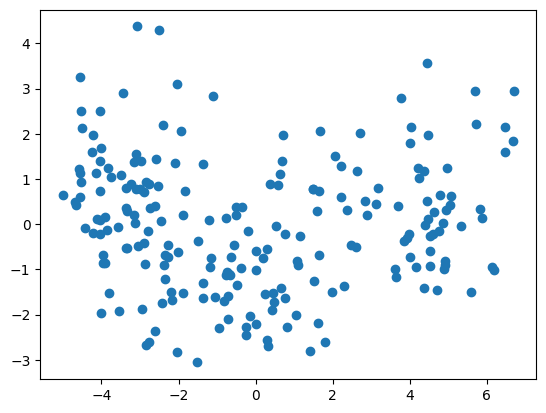

In [67]:
plt.scatter(transformed_x[:,0], transformed_x[:,1])
plt.show()

In [68]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x, kmeans.labels_.reshape(-1, 1))), columns=["pca1", "pca2", "class"])
truth_pca_df = pd.DataFrame(np.hstack((transformed_x, df["class"].values.reshape(-1, 1))), columns=["pca1", "pca2", "class"])

In [69]:
# K-means classes
sn.scatterplot(x="pca1", y="pca2", data=kmeans_pca_df, hue="class")
plt.show()

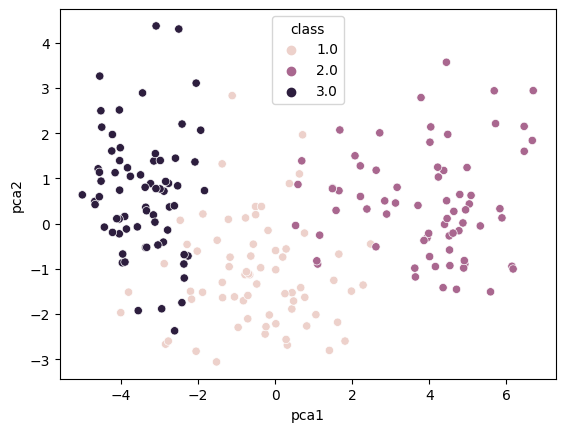

In [70]:
# Truth classes
sn.scatterplot(x="pca1", y="pca2", data=truth_pca_df, hue="class")
plt.show()